In [1]:
%matplotlib notebook
import matplotlib
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Jupyter Specifics
%matplotlib inline
from IPython.display import display, HTML
from ipywidgets.widgets import interact, interactive, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons, fixed
display(HTML("<style>.container { width:100% !important; }</style>"))
style = {'description_width': '100px'}
slider_layout = Layout(width='99%')

/Users/n/.pyenv/versions/3.7.2/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Getting data:
getting JHU data...
jhu data selected from 1/22/20 to 10/8/20
expanding JHU data : to new (daily), 7-day rolling (smoothed), reporting glitch (corrected) and combined


France deaths maximum frequency component at 39 in vector of length 130


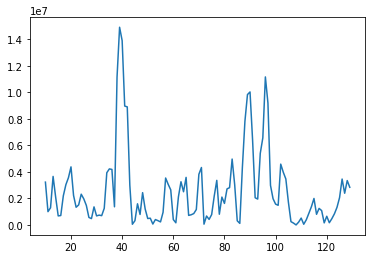

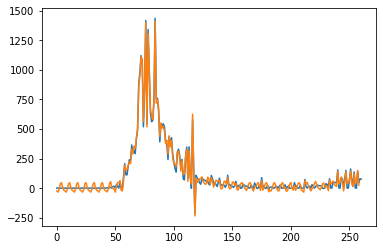

Italy deaths maximum frequency component at 10 in vector of length 130


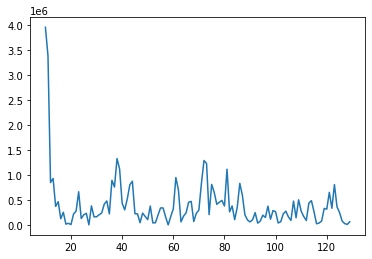

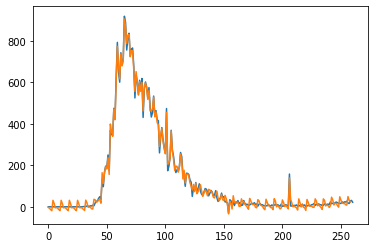

Peru deaths maximum frequency component at 59 in vector of length 130


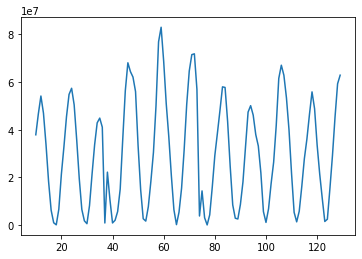

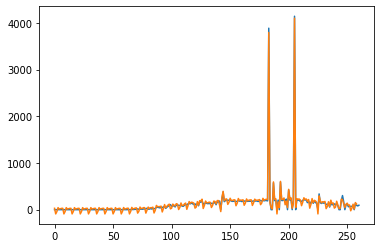

Spain deaths maximum frequency component at 119 in vector of length 130


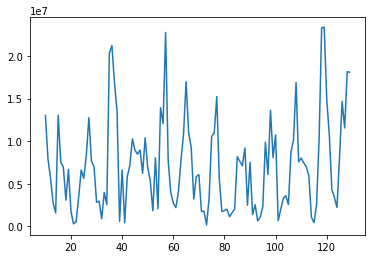

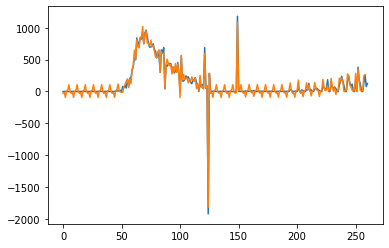

Sweden deaths maximum frequency component at 10 in vector of length 130


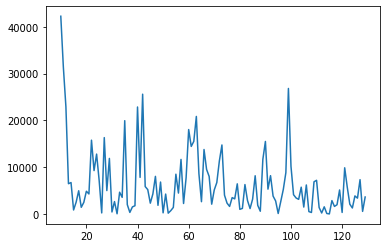

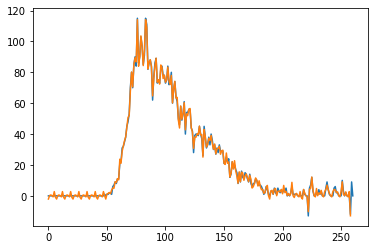

Australia deaths maximum frequency component at 57 in vector of length 130


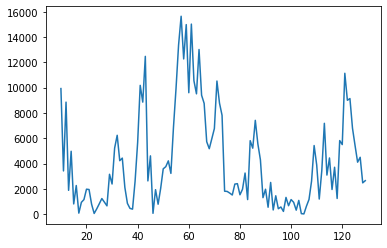

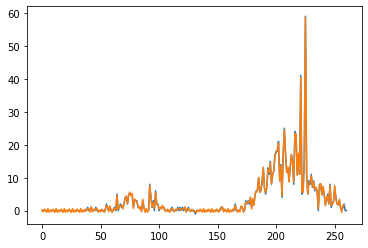

France deaths maximum frequency component at 39 in vector of length 130


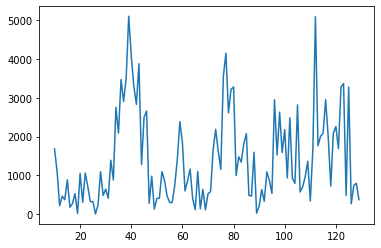

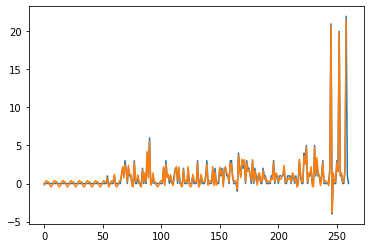

France confirmed maximum frequency component at 75 in vector of length 130


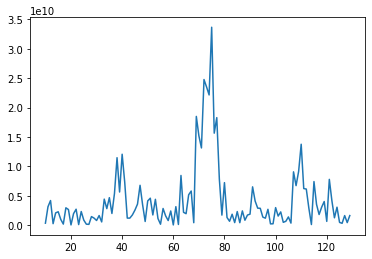

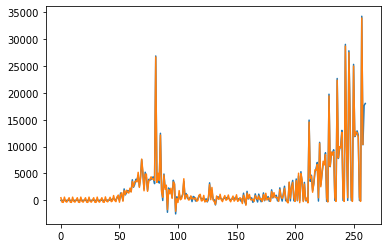

Italy confirmed maximum frequency component at 39 in vector of length 130


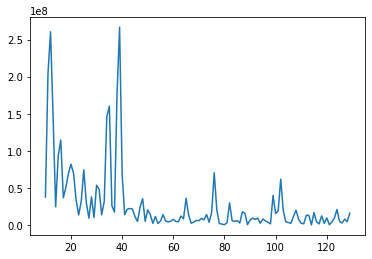

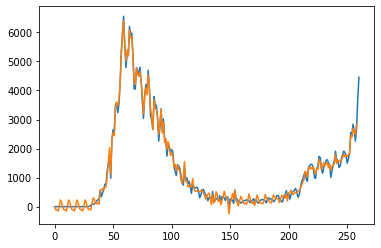

Peru confirmed maximum frequency component at 110 in vector of length 130


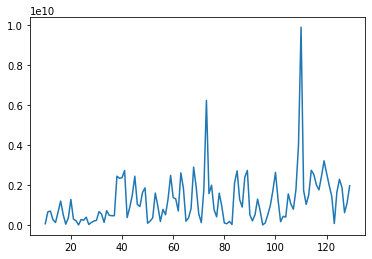

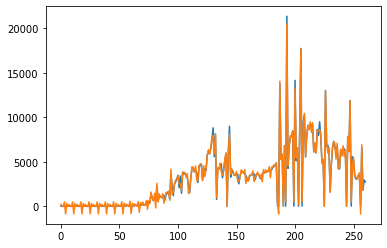

Spain confirmed maximum frequency component at 75 in vector of length 130


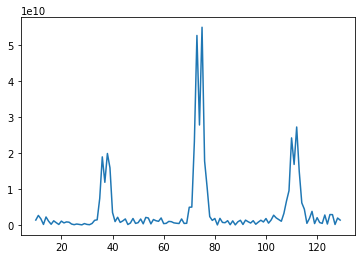

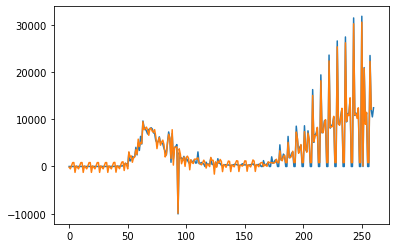

Sweden confirmed maximum frequency component at 38 in vector of length 130


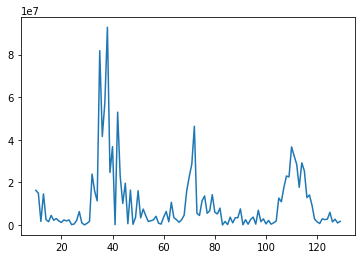

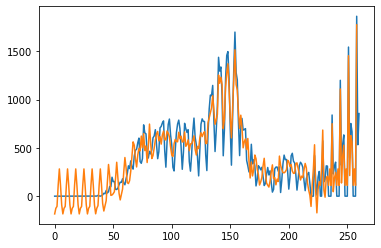

Australia confirmed maximum frequency component at 10 in vector of length 130


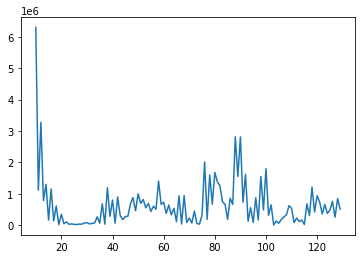

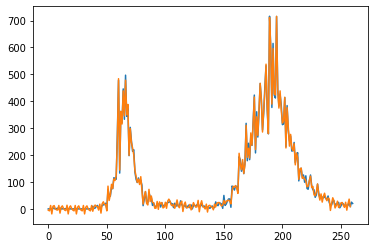

France confirmed maximum frequency component at 38 in vector of length 130


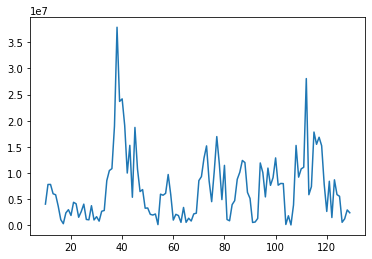

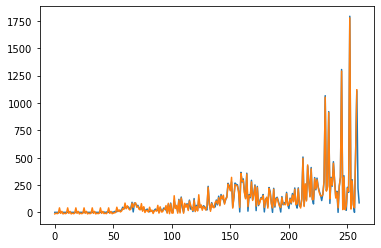


expansion done.
number of countries listed in JHU database 193
done with JHU data (covid_ts dictionary keys: confirmed, deaths, recovered).
getting owid data...
owid data selected from 1/23/20 to 10/9/20
expanding OWID data : to new (daily), 7-day rolling (smoothed), reporting glitch (corrected) and combined


Australia deaths maximum frequency component at 57 in vector of length 130


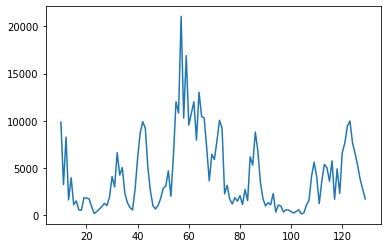

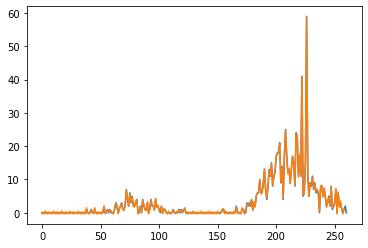

France deaths maximum frequency component at 38 in vector of length 130


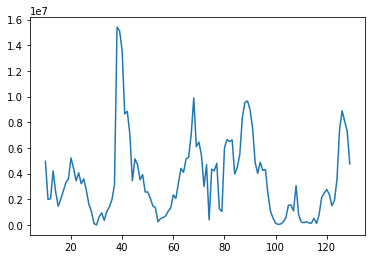

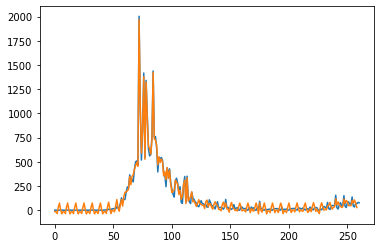

Italy deaths maximum frequency component at 10 in vector of length 130


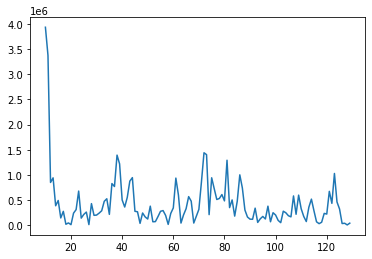

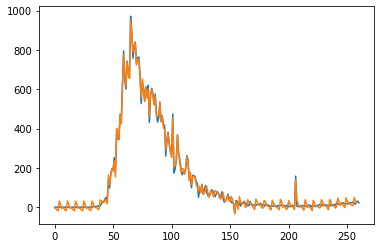

Peru deaths maximum frequency component at 62 in vector of length 130


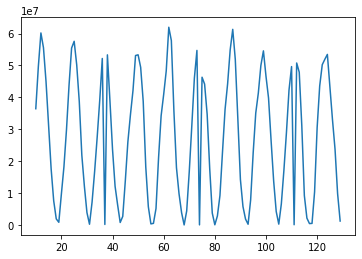

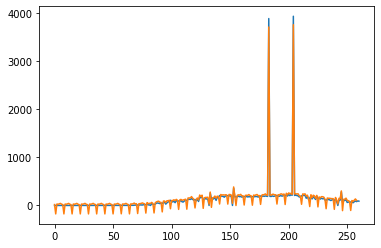

Spain deaths maximum frequency component at 36 in vector of length 130


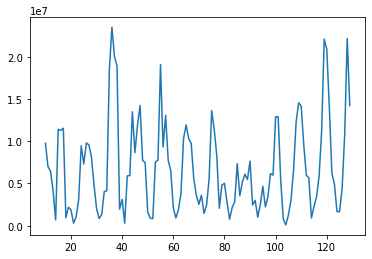

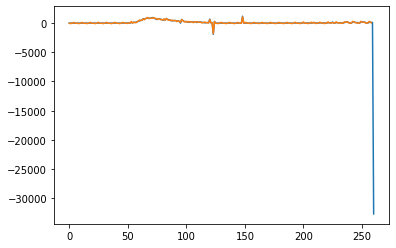

Sweden deaths maximum frequency component at 10 in vector of length 130


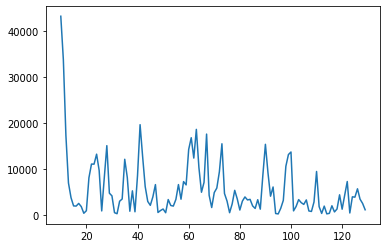

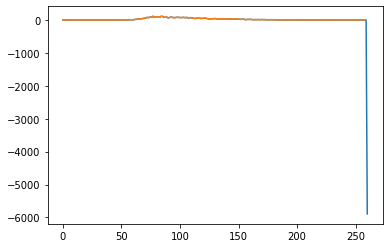

United States deaths maximum frequency component at 36 in vector of length 130


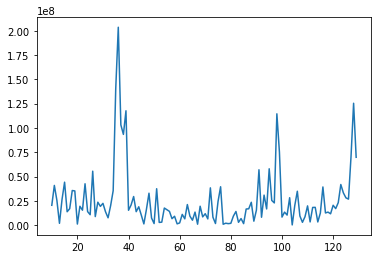

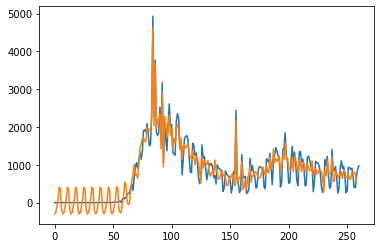

Australia confirmed maximum frequency component at 10 in vector of length 130


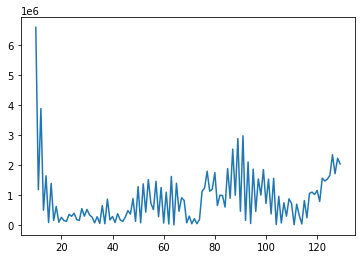

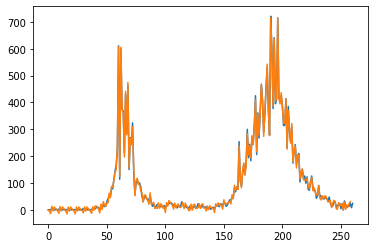

France confirmed maximum frequency component at 35 in vector of length 130


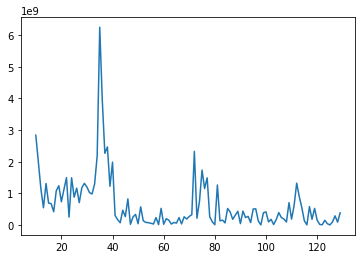

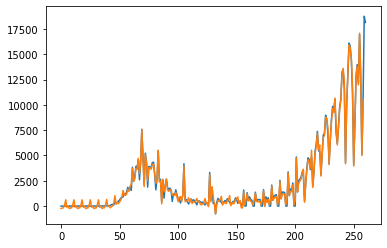

Italy confirmed maximum frequency component at 12 in vector of length 130


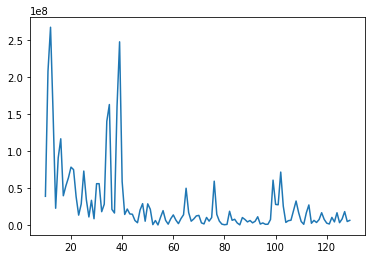

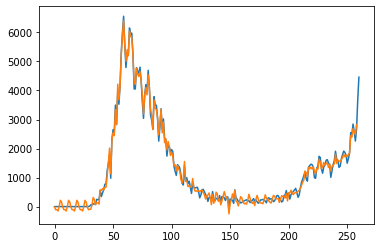

Peru confirmed maximum frequency component at 36 in vector of length 130


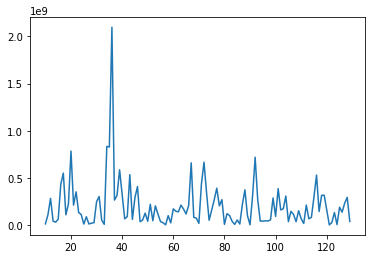

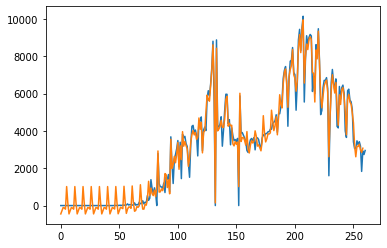

Spain confirmed maximum frequency component at 73 in vector of length 130


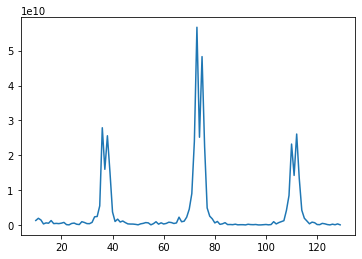

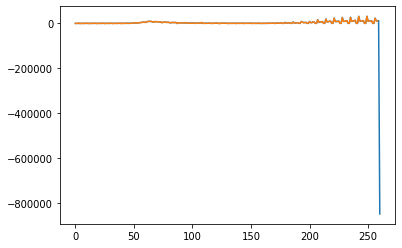

Sweden confirmed maximum frequency component at 36 in vector of length 130


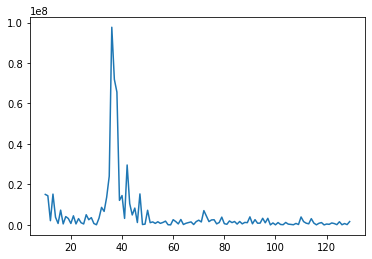

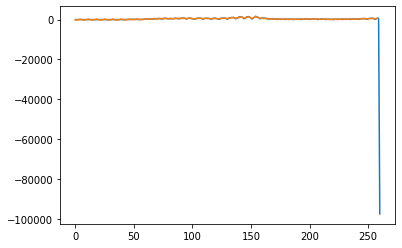

United States confirmed maximum frequency component at 35 in vector of length 130


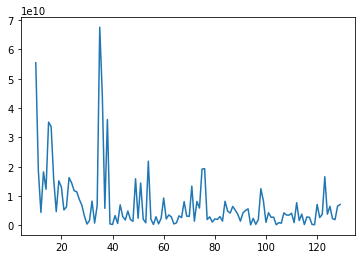

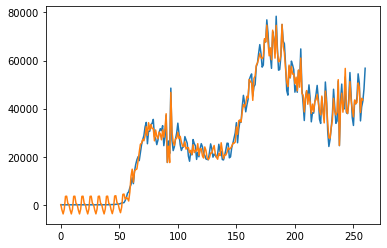


number of countries listed in OWID database 212
done with OWID data (covid_owid_ts dictionary see .keys()) .
mapping country names between JHU and OWID and extracting common countries...
getting ICU and acute care data icus_2012 and WHO ...
WHO acute file found dictionary acute_who
ICU file found dictionary icus_2012
extracting data sets for common countries both databases...
No of big common countries is 83
---------------------------------
extracting testing data from OWID database
doing piecewise linear fits to testing data ... reg_testing



completed regularization of testing by pwlf and linear adjustment to confirmed cases (linr).
constructing nonlinear adjustment to confirmed cases based on pwlf testing (nonlin and nonlinr ...
completed nonlinear adjustment to confirmed cases.
Done with data.
---------------------------------
Constructing common synchronized deaths, case and testing data...
debug len(total_deaths) 186
debug len(big) 83
synchronizing and trimming time series to common length...
making cases with nonlinear testing adjustment...
done.
to change the nonlinear correction function, call make_cases_adj_nonlin(K), K=2 by default
----------------------------------------
Finished loading Cluster module
----------------------------------------


In [2]:
from Cluster import *

In [3]:
print(len(countries_jhu_4_owid),len(countries_jhu_2_owid),len(countries_owid),len(countries_jhu))
print('countries in common: owid format')
print(countries_jhu_2_owid)
print('')
print('owid countries not in common set')
print(set(countries_owid)-set(countries_jhu_2_owid))
print('')
print('countries in common: jhu format')
print(countries_owid_to_jhu)
print('')
print(len(bcountries),'bcountries',bcountries)

187 187 212 193
countries in common: owid format
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Myanmar', 'Burundi', 'Cape Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros', 'Congo', 'Democratic Republic of Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Swaziland', 'Ethiopia', 'Fiji', 'Finland', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Vatican', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ira

In [4]:
cases = [c for c in clusdata_all]
cases

['deaths',
 'cases',
 'cases_lin2020',
 'cases_pwlfit',
 'cases_nonlin',
 'cases_nonlinr']

In [5]:
datasets = ['deaths','cases','cases_lin2020','cases_pwlfit','cases_nonlin']

d_countries = [c for c in clusdata_all['deaths']]
c_countries = [c for c in clusdata_all['cases']]
lc_countries = [c for c in clusdata_all['cases_lin2020']]
pc_countries = [c for c in clusdata_all['cases_pwlfit']]
nc_countries = [c for c in clusdata_all['cases_nonlin']]

countries = d_countries

In [6]:
print(len(d_countries))
print(np.sort(d_countries))

67
['Afghanistan' 'Albania' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Belarus' 'Belgium' 'Bolivia' 'Bosnia and Herzegovina'
 'Brazil' 'Bulgaria' 'Canada' 'Chile' 'Colombia' 'Croatia'
 'Czech Republic' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Finland' 'Germany' 'Greece' 'Guatemala' 'Honduras' 'Hungary' 'India'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Kazakhstan' 'Kosovo' 'Kuwait'
 'Kyrgyzstan' 'Lebanon' 'Luxembourg' 'Macedonia' 'Mexico' 'Moldova'
 'Morocco' 'Norway' 'Oman' 'Pakistan' 'Panama' 'Peru' 'Philippines'
 'Poland' 'Portugal' 'Qatar' 'Romania' 'Russia' 'Saudi Arabia' 'Serbia'
 'Slovenia' 'South Africa' 'Spain' 'Sweden' 'Switzerland' 'Tunisia'
 'Turkey' 'Ukraine' 'United Arab Emirates' 'United States']


In [7]:
# check that all country sets being used are the same and check time series lengths and starting dates
countrysets = [d_countries,c_countries,lc_countries,pc_countries,nc_countries]
print([len(ccs) for ccs in countrysets])
for ccs1 in countrysets:
    print([ccs1 == ccs2 for ccs2 in countrysets])
print([len(clusdata_all[d1]['United States']) for d1 in datasets])
# print(len(total_deaths_x['dates']),len(total_cases_x['dates']),len(testing_x['dates']),total_deaths_x['dates'][0],total_cases_x['dates'][0],testing_x['dates'][0])

[67, 67, 67, 67, 67]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[155, 155, 155, 155, 155]


In [8]:
# 61 countries on Sep 24 with mindeaths=200 and mindays=160
# note that changing the minimal common active epidemic time series length mindays from 160 to 150 included only 4 new countries on Sep 24
# decreasing minimal total death count from 200 to 100 included only 3 new countries on Sep 24 
# doing both included 7 new countries : 68 in total 
len(testing_x['dates'])

261

In [ ]:
covid_owid[0].keys()

In [ ]:
covid_ts.keys()

In [ ]:
covid_owid_ts.keys()

## fft / filter play

In [9]:
[x for x in covid_ts]

['confirmed',
 'deaths',
 'recovered',
 'new_deaths',
 'new_deaths_smoothed',
 'deaths_smoothed',
 'new_deaths_corrected',
 'new_deaths_corrected_smoothed',
 'deaths_corrected_smoothed',
 'new_confirmed',
 'new_confirmed_smoothed',
 'confirmed_smoothed',
 'new_confirmed_corrected',
 'new_confirmed_corrected_smoothed',
 'confirmed_corrected_smoothed',
 'confirmed_linr_corrected_smoothed',
 'new_confirmed_nonlin_corrected_smoothed',
 'confirmed_nonlin_corrected_smoothed',
 'new_confirmed_nonlinr_corrected_smoothed',
 'confirmed_nonlinr_corrected_smoothed']

In [13]:
[x for x in covid_ts['deaths'] if 'US' in x]

[('US', '')]

In [21]:
foo = covid_ts['new_deaths'][('US','')]

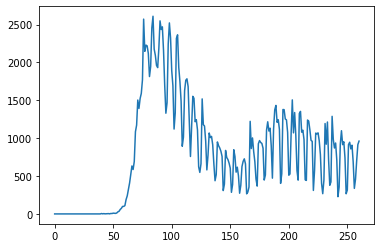

In [22]:
plt.plot(foo);

In [44]:

foo = foo[:259]
fftdat = np.fft.rfft(foo)

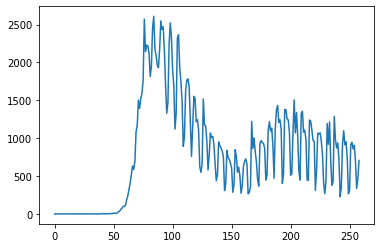

In [45]:
plt.plot(foo);

In [86]:
width = 31
hwidth = int(width/2)
# windows:
# bartlett (triangle)
# blackman, hamming, hanning (cos hump with different size tails)
# kaiser (from bessel, with beta param = 0 rectangula, 5 hamming, 6 hanning, 8.6 blackman)
# cf.  https://numpy.org/doc/stable/reference/routines.window.html

wfoo = 1-np.kaiser(width,15)
wfoo = 1-np.blackman(width)

win = 1+np.zeros(len(fftdat))

for k in [37,74,111]:
    for i in range(k-hwidth,k+hwidth):
        win[i] = wfoo[i-k+hwidth]

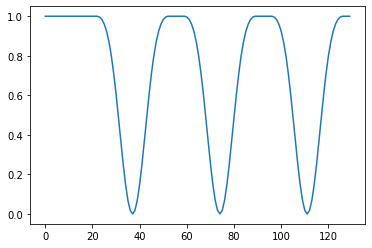

In [87]:
plt.plot(win)

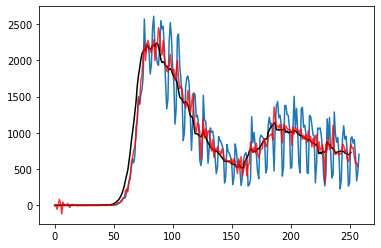

In [90]:
filtdat = [fftdat[i]*win[i] for i in range(len(win))]

smoothed = np.fft.irfft(filtdat)
rollingave = foo.copy()
rollingave = [np.mean(foo[(i-7):i]) for i in range(7,len(foo))]

plt.plot(foo);
plt.plot(rollingave,color='black')
plt.plot(smoothed,color='red',alpha=0.8);


# Comparison and cleaning of data : JHU and OWID

## Country list translations

In [ ]:
print([cc[0] for cc in countries_jhu])

In [ ]:
countries_jhu_str_totals= [cc[0] for cc in countries_jhu if cc[1] == 'Total']
countries_jhu_str = [cc[0] for cc in countries_jhu if cc[0] not in countries_jhu_str_totals ]
countries_jhu_str = countries_jhu_str + countries_jhu_str_totals
set(countries_jhu_str)-set(countries_owid)

In [ ]:
countries_jhu_str_totals

In [ ]:
jhu_to_owid_country = {
    'Burma':'Myanmar',
    'Cabo Verde':'Cape Verde',
    'Congo (Brazzaville)':'Congo',
    'Congo (Kinshasa)':'Democratic Republic of Congo',
    'Czechia':'Czech Republic',
    'Diamond Princess':'Diamond Princess',
    'Eswatini':'Swaziland',
    'Holy See':'Vatican',
    'Korea, South':'South Korea',
    'MS Zaandam':'MS Zaandam',
    'North Macedonia':'Macedonia',
    'Taiwan*':'Taiwan',
    'Timor-Leste':'Timor',
    'US':'United States',
    'West Bank and Gaza':'Palestine'
}
for cc in countries_owid:
    jhu_to_owid_country.update({cc:cc})

In [ ]:
population_owid.keys()
print(len(population_owid.keys()))
for cc in population_owid:
    print(cc,population_owid[cc][-2])

In [ ]:
countries_jhu_t_str=[jhu_to_owid_country[cc[0]] for cc in countries_jhu]
set(countries_jhu_t_str)-set(countries_owid)

In [ ]:
set(countries_owid)-set(countries_jhu_t_str)

In [ ]:
set(countries)-set(countries_jhu_t_str)  # check that all countries in our reduced list 

The problem is that Puerto Rico is a territory of the US
and JHU has it split up into the lower admin levels and only in the separate US database csv files.
We would need to sum these to get Puerto Rico and then only available confirmed and deaths not recovered.
I have not attempted this so far.

In [ ]:
population_owid['Puerto Rico'][-1]

## Comparison dates set for data JHU and OWID

In [ ]:
print('jhu',covid_ts['deaths']['dates'][0],covid_ts['deaths']['dates'][-1])
print('owid',covid_owid_ts['deaths']['dates'][0],covid_owid_ts['deaths']['dates'][-1])
print('difference in length',len(covid_owid_ts['deaths']['dates'])-len(covid_ts['deaths']['dates']))
# the next line gives false, becuas eof single day adjustment
print('calculated common portion the same',covid_owid_ts['deaths']['dates']==covid_ts['deaths']['dates'])
print('this is OK (false) because dates neeed to be shifted by one day')

## Comparison of deaths and confirmed case data JHU and OWID

In [ ]:
covid_ts['deaths_daily'] = {}
covid_ts['deaths_daily_smoothed'] = {}
for cc in covid_ts['deaths']:
    if cc is not 'dates':
        tseries = covid_ts['deaths'][cc]
        diff = np.zeros(len(tseries),dtype=float)
        for t,s in enumerate(tseries):
            if t == 0:
                diff[t]= s-0.
            else:
                diff[t] = s - tseries[t-1]
        covid_ts['deaths_daily'].update({cc : diff})
        
        week = 0.  
        rollav7 = np.zeros(len(tseries),dtype=float)
        for t,s in enumerate(diff):
            week = week + s
            if t >= 7:
                week = week - diff[t-7]
                rollav7[t] = week/7.
            else:
                rollav7[t] = week/(t+1)
        covid_ts['deaths_daily_smoothed'].update({cc : rollav7})

covid_owid_ts['deaths_daily'] = {}
covid_owid_ts['deaths_daily_smoothed'] = {}
for cc in covid_owid_ts['deaths']:
    if cc is not 'dates':
        tseries = covid_owid_ts['deaths'][cc]
        diff = np.zeros(len(tseries),dtype=float)
        for t,s in enumerate(tseries):
            if t == 0:
                diff[t]= s-0.
            else:
                diff[t] = s - tseries[t-1]
        covid_owid_ts['deaths_daily'].update({cc : diff})
        
        week = 0.  
        rollav7 = np.zeros(len(tseries),dtype=float)
        for t,s in enumerate(diff):
            week = week + s
            if t >= 7:
                week = week - diff[t-7]
                rollav7[t] = week/7.
            else:
                rollav7[t] = week/(t+1)
        covid_owid_ts['deaths_daily_smoothed'].update({cc : rollav7})         

In [ ]:
country = 'Spain'
country_jhu = (country,'')
d1 = np.array(covid_ts['new_deaths_corrected_smoothed'][country_jhu][:]).astype(float)
d2 = np.array(covid_owid_ts['new_deaths_corrected_smoothed'][country][:]).astype(float)

#print('jhu',d1)
#print('owid',d2)
#print('jhu-owid',d1-d2)
fig,axes = plt.subplots(1,1,figsize=(16,8))
axes.plot(range(len(d1)),d1)
axes.plot(range(len(d2)),d2)
ax20 = axes.twinx()
ax20.plot(range(len(d2)),d1-d2,c='grey')

In [ ]:
country = 'Germany'
country_jhu = (country,'')
d1 = np.array(covid_ts['deaths_daily_smoothed'][country_jhu][:]).astype(float)
d2 = np.array(covid_owid_ts['deaths_daily_smoothed'][country][:])

#print('jhu',d1)
#print('owid',d2)
#print('jhu-owid',d1-d2)
fig,axes = plt.subplots(1,1,figsize=(16,8))
axes.plot(range(len(d1)),d1)
axes.plot(range(len(d2)),d2)
ax20 = axes.twinx()
ax20.plot(range(len(d2)),d1-d2,c='grey')

In [ ]:
covid_ts.keys()

In [ ]:
def plot_corrections(country='Peru',dtype='deaths',database='jhu'):
    global countries_jhu_str_totals
    new_dtype = 'new_'+ dtype
    new_dtype_corrected =  new_dtype + '_corrected'
    new_dtype_smoothed =  new_dtype + '_smoothed'
    new_dtype_corrected_smoothed =  new_dtype + '_corrected' + '_smoothed'
    if database == 'jhu':
        if country in countries_jhu_str_totals:
            country_f = (country,'Total')
        else:
            country_f = (country,'')
        covidts = covid_ts
    else:
        covidts = covid_owid_ts
        country_f = country
    d0 = np.array(covidts[new_dtype][country_f][:]).astype(float)
    d1 = np.array(covidts[new_dtype_corrected][country_f][:]).astype(float)
    d2 = np.array(covidts[new_dtype_smoothed][country_f][:]).astype(float)
    d3 = np.array(covidts[new_dtype_corrected_smoothed][country_f][:]).astype(float)
    fig,axes = plt.subplots(1,1,figsize=(24,8))
    axes.plot(range(len(d0)),d0,label='raw')
    axes.plot(range(len(d1)),d1,label='corrected',alpha=0.3,linewidth=5)
    axes.plot(range(len(d2)),d2,label='smoothed',alpha=0.3,linewidth=5)
    axes.plot(range(len(d3)),d3,label='corrected smoothed')
    # axes.set_ylim((-10.,500.))
    axes.set_xticks(np.linspace(0.,len(d2)-len(d2)%10,int((len(d2)-len(d2)%10)/10.+1)))
    #ax2 = axes.twinx()
    #ax2.plot(range(len(d2)),d2-d3,c='grey')
    axes.legend()
    axes.set_title(country+' '+dtype+' comparison')
    fig,axes = plt.subplots(1,1,figsize=(24,8))
    axes.plot(range(len(d3)),d3)
    axes.set_title(country+' '+dtype+' corrected smoothed')

In [ ]:
plot_corrections('Peru','deaths')
plot_corrections('Peru','confirmed')
plot_corrections('Spain','deaths')
plot_corrections('Spain','confirmed')
plot_corrections('France','deaths')
plot_corrections('France','confirmed')
plot_corrections('Sweden','deaths')
plot_corrections('Sweden','confirmed')

In [ ]:
plot_corrections('France','deaths',database='owid')
plot_corrections('France','confirmed',database='owid')
plot_corrections('Sweden','deaths',database='owid')
plot_corrections('Sweden','confirmed',database='owid')

In [ ]:
plot_corrections('Australia','deaths')
plot_corrections('Australia','confirmed')

# ClusterFit testing

In [ ]:
np.argsort(list(range(4,14)))[-1:][0]

16000 2 seats

In [ ]:

base = '../../covid-19-JH/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_jhu = get_data(base+'time_series_covid19_confirmed_global.csv')
deaths_jhu = get_data(base+'time_series_covid19_deaths_global.csv')

In [ ]:
[x for x in dir() if 'death' in x]

In [ ]:
country = 'Denmark'
fig,ax = plt.subplots()
ax.plot(new_cases_spm[country])
axx = ax.twinx()
axx.plot(new_deaths_spm[country],color='red');


In [ ]:
country = 'Germany'
fig,ax = plt.subplots()
ax.plot(new_cases_spm[country])
axx = ax.twinx()
axx.plot(new_deaths_spm[country],color='red');



In [ ]:
country = 'France'
fig,ax = plt.subplots()
ax.plot(new_cases_spm[country])
axx = ax.twinx()
axx.plot(new_deaths_spm[country],color='red');



In [ ]:
def plot_all2(countries,dat,adj=None,testing=None,ndays=250):
    max_cols=6
    max_rows=int(len(countries)/max_cols) + 1
    fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(24,4*max_rows))

    for idx, country  in enumerate(countries):
        row = idx // max_cols
        col = idx % max_cols
        axes[row,col].plot(dat[country])
        axes[row,col].set_title(country)
        if adj is not None:
            ax = axes[row,col].twinx()
            ax.plot(adj[country],color='darkred',alpha=0.6)
    for idx in range(len(countries),max_rows*max_cols):
        row = idx // max_cols
        col = idx % max_cols
        axes[row, col].axis("off")
    #plt.subplots_adjust(wspace=.05, hspace=.05)
    fig.tight_layout()
    #for ax in fig.get_axes():
    #    ax.label_outer()
    plt.show()


In [ ]:
plot_all2(countries,new_cases_spm,new_deaths_spm)

In [ ]:

plt.plot(confirmed_jhu[('Germany','')])

## cases

In [ ]:
len(clusdata_all['cases'])

In [ ]:
#foo = ClusterFit(clusdata_all['cases'],fft='fft') # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['cases'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
foo = ClusterFit(clusdata_all['cases'],fft=None) 

In [ ]:
foo.umap_cluster(5,5,n_neighbors=6)
print('mean cluster membership probability =',np.mean(foo.clus_probs))
foo.plot_umap()

In [ ]:
foo.clus_labels
print(len(foo.clus_labels))
print(len(c_countries))

In [ ]:
foo.clus_labels

In [ ]:
labelled = [(foo.clus_labels[i],c_countries[i]) for i in range(len(foo.clus_labels))]
print(labelled)

In [ ]:
np.lexsort((c_countries,foo.clus_labels))

In [ ]:
# foo.umap_best_cluster(Nclus=3)
foo.umap_best_cluster(Nclus=4,n_neighbors=6)

In [ ]:
foo.plot_umap()

In [ ]:
np.mean(foo.clus_probs)

In [ ]:
foo.clus_labels

In [ ]:
foo.cluster_plot_all()

In [ ]:
foo.plot_pcas()

In [ ]:
clsize = []
clprobs = []
for i in range(100):
    foo.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foo.clus_labels)))
    clprobs.append(np.mean(foo.clus_probs))

In [ ]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

In [ ]:
# min_size = 6
plt.scatter(clsize,clprobs)

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);

In [ ]:
plt.hist(clprobs);

In [ ]:
clusfit_all = {}
clusfit_all['cases'] = foo

## cases FFT

In [ ]:
len(clusdata_all['cases'])

In [ ]:
foofft = ClusterFit(clusdata_all['cases'],fft='fft') # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['cases'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
#foo = ClusterFit(clusdata_all['cases'],fft=None) 

In [ ]:
foofft.umap_cluster(5,5)
print('mean cluster membership probability =',np.mean(foofft.clus_probs))
foofft.plot_umap()

In [ ]:
# foo.umap_best_cluster(Nclus=3)
foofft.umap_best_cluster()

In [ ]:
foofft.plot_umap()

In [ ]:
np.mean(foofft.clus_probs)

In [ ]:
foofft.clus_labels

In [ ]:
foofft.cluster_plot_all()

In [ ]:
foofft.plot_pcas()

In [ ]:
clsize = []
clprobs = []
for i in range(100):
    foofft.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foofft.clus_labels)))
    clprobs.append(np.mean(foofft.clus_probs))

In [ ]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

In [ ]:
# min_size = 6
plt.scatter(clsize,clprobs)

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);

In [ ]:
plt.hist(clprobs);

In [ ]:
clusfit_all = {}
clusfit_all['cases'] = foofft

## deaths

In [ ]:
len(clusdata_all['deaths'])

In [ ]:
foo = ClusterFit(clusdata_all['deaths']) # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['deaths'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
#foo = ClusterFit(clusdata_all['deaths'],fft=None) 

In [ ]:
foo.umap_cluster(5,5)
print('mean cluster membership probability =',np.mean(foofft.clus_probs))
foo.plot_umap()

In [ ]:
# foo.umap_best_cluster(Nclus=3)
foo.umap_best_cluster(Nclus=3)

In [ ]:
foo.plot_umap()

In [ ]:
np.mean(foo.clus_probs)

In [ ]:
foo.cluster_plot_all()

In [ ]:
foo.plot_pcas()

In [ ]:
clsize = []
clprobs = []
for i in range(100):
    foo.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foo.clus_labels)))
    clprobs.append(np.mean(foo.clus_probs))

In [ ]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

In [ ]:
# min_size = 6
plt.scatter(clsize,clprobs)

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);

In [ ]:
plt.hist(clprobs);

In [ ]:
clusfit_all = {}
clusfit_all['cases'] = foo

## deaths FFT

In [ ]:
foofft = ClusterFit(clusdata_all['deaths'],fft='fft')

In [ ]:
foofft.umap_cluster(3) # arg = random seed

In [ ]:
foofft.plot_umap()

In [ ]:
foofft.umap_best_cluster()

In [ ]:
foofft.plot_umap()

In [ ]:
foofft.plot_pcas()

In [ ]:
clusfit_all['deaths'] = foofft

# Plots of all countries

In [ ]:
plot_all(countries,clusdata_all['deaths'])

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlin'],longshort_testing_c)

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlinr'],longshort_reg_testing_c)

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_pwlfit'],longshort_reg_testing_c)

In [ ]:
plot_all(lcountries,cases_raw,cases_adj_lin2020)

# Compare best clusters

In [ ]:
datasets = [c for c in clusdata_all]
datasets

In [ ]:
len(countries)

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlinr']);

In [ ]:
#  Norman not sure I understand what you are printing out with "found 48 clusters of size 3" , seems wrong
res = {}
for d in datasets:
    print('doing ',d,'...')
    mfit = ClusterFit(clusdata_all[d])
    mfit.umap_best_cluster()
    res[d] = mfit

In [ ]:
for rr in res:
    foo = res[rr]
    # foo.plot_umap() ########## doesn't work???
    plt.scatter(foo.um_dat[0],foo.um_dat[1],c=foo.clus_labels)
    plt.title(rr)
    plt.show()

In [ ]:
def corcl(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))/float(len(set(a).union(set(b))))
    else:
        return 1 
    
def matchset(a,x):
    rtn = [i for i in range(len(a)) if a[i] == x]
    return rtn

def match1(a,x):
    rtn = [1 for i in range(len(a)) if a[i] == x]
    return rtn
    
def imxcor(clusters,nset,n,nclus,nclusmax=6): 
    """ finds cluster index in previous datasets d best correlated to cluster n in dataset dd
        nclus is current number of already aligned clusters
        nclusmax is max allowed number of clusters
    """
    cx = []
    cc = clusters[nset]
    for j in range(0,nset):
        c = mapclusters[j]
        klen = min(nclusmax,len(cc))
        for k in range(nclus): # find best matching previous cluster
            cx.append(np.sum(match1(cc,n)*match1(c,k)))
    return argmax(cx),max(cx)

In [ ]:
maxclusters = 6
clusters = [res[d].clus_labels for d in res]
ncountries = len(res['deaths'])
mapclusters = np.zeros((len(clusters),ncountries)
mapclusters[0,:] = clusters[0,:] # class lables are those of deaths to start, may be expanded
corclasses = np.zeros((len(classes),len(classes)))
c = clusters[0] # the first dataset clusters are all accepted as first clusters
nclusters = len(set(c))                    
for j in range(1,len(clusters)):
    cc = clusters[j] # clus_labels for jth dataset
                      # map clusters to best matching cluster in 0th dataset : losers try with other previous datasets : losers new
    for k in set(cc):
                       i,cor = imxcor(k,cc,nclusmax=nclasses)
                       
    corclasses[i,j] = mxcor(c,cc)
    corclasses[j,i] = corclasses[i,j]
for i in range(len(classes)):
    corclasses[i,i] = 1.0
plt.imshow(corclasses)    

In [ ]:
print([(i,c,np.mean(corclasses[i,:])) for i,c in enumerate([r for r in res])])

In [ ]:
for i in range(6):
    plt.plot(list(range(6)),corclasses[i,:])

Note: `cases_nonlin` and `cases_nonlinr` currently same.

**Cluster correlations not outstandingly high!**

In [ ]:
foo = res['cases_nonlin']

In [ ]:
def plot_adj(country, data, adj = None, testing=None,  ndays=250, axis = None):
    ndays = 250
    if testing:
        # Ntests = regtests(testing,country)  # this does not work here, since data is already synchronized, use regularized data in testing 
        Ntests = testing[country]
    if axis is None:   
        fig, ax1 = plt.subplots(figsize=(12,8))
    else:
        ax1 = axis
    ax1.plot(data[country][:ndays]) 
    if adj is not None:  # already adjusted
        ax1.plot(adj[country][:ndays])
    ax1.set_title(country)
    ax1.set_ylabel('Cases/million')
    ax1.set_xlabel('day')
    if testing:
        ax2 = ax1.twinx()
        ax2.plot(Ntests[:ndays],color='red',alpha=0.4)
        ax2.set_ylabel('Testing/1000')

        
def plot_all(countries,dat,adj=None,testing=None,ndays=250):
    max_cols=6
    max_rows=int(len(countries)/max_cols) + 1
    fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(24,4*max_rows))

    for idx, country  in enumerate(countries):
        row = idx // max_cols
        col = idx % max_cols
        plot_adj(country,dat,adj,testing,ndays,axis=axes[row,col])
    for idx in range(len(countries),max_rows*max_cols):
        row = idx // max_cols
        col = idx % max_cols
        axes[row, col].axis("off")
    #plt.subplots_adjust(wspace=.05, hspace=.05)
    fig.tight_layout()
    #for ax in fig.get_axes():
    #    ax.label_outer()
    plt.show()


In [ ]:
plt.plot(foo.smoothed[0])

In [ ]:
len(foo.dat[0,:])

In [ ]:
dat1 = {countries[i]:foo.dat[i,:] for i in range(len(countries))}
dat2 = {countries[i]:foo.smoothed[i,:] for i in range(len(countries))}
plot_all(countries,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus0 = [i for i,x in enumerate(res[cc].clus_labels) if x==0]

count0 = [countries[i] for i in clus0]
plot_all(count0,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus = [i for i,x in enumerate(res[cc].clus_labels) if x==1]

count = [countries[i] for i in clus]
plot_all(count,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus = [i for i,x in enumerate(res[cc].clus_labels) if x==2]

count = [countries[i] for i in clus]
plot_all(count,dat1,dat2)

# Hdbscan on raw data

First view of HDBSCAN, a hierarchical clustering algorithm, applied here to raw data.

HDBSCAN is a clustering algorithm developed by Campello, Moulavi, and Sander. 

It extends DBSCAN by converting it into a hierarchical clustering algorithm, 
and then using a technique to extract a flat clustering based in the stability of clusters.

In [ ]:
foodeath = ClusterFit(clusdata_all['deaths'])

In [ ]:
foodeath.hdbscan()

In [ ]:
foodeath.umap(n_neighbors=4)  # execute the umap projection on the death data

In [ ]:
len(foodeath.clus_labels)

In [ ]:
foodeath.clus_labels

In [ ]:
foodeath.plot_umap() # our plot routine in the ClusterFit class uses the clus_labels to colour points

There are only two clusters: the red points (-1 values) are unclustered.

# hdbscan on raw PCA

In this section we perform hierarchical clustering on the PCA projected data

In [ ]:
foodeath = ClusterFit(clusdata_all['deaths'])

In [ ]:
foodeath.hdbscan_pca()

In [ ]:
foodeath.umap(n_neighbors=4)

In [ ]:
len(foodeath.clus_labels)

In [ ]:
foodeath.clus_labels

In [ ]:
foodeath.plot_umap()

There are only two clusters: the red points (-1 values) are unclustered.

# FPCA

[Example](https://fda.readthedocs.io/en/latest/auto_examples/plot_fpca.html#sphx-glr-auto-examples-plot-fpca-py) of FPCA...

Also: see same example in the fpca_example notebook.

Also:  see [documentation](https://fda.readthedocs.io/en/latest/modules/preprocessing/dim_reduction/autosummary/skfda.preprocessing.dim_reduction.projection.FPCA.html?highlight=fpca) for FPCA.

## Using raw data (as discrete samples)

### Preliminary scratch...

In [ ]:
dat = foodeath.dat

In [ ]:
foodeath.fitted.shape

In [ ]:
dat.shape

In [ ]:
import skfda
from skfda.datasets import fetch_growth
from skfda.exploratory.visualization import plot_fpca_perturbation_graphs
from skfda.preprocessing.dim_reduction.projection import FPCA
from skfda.representation.basis import BSpline, Fourier, Monomial



In [ ]:
len(dat[0])

Configure data a samples of a function on a grid, specify the grid as list of days:

In [ ]:
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

In [ ]:
len(dat_disc)

In [ ]:
dat_disc.plot()

In [ ]:
idx = [i for i,x in enumerate(countries) if x=="Spain"][0]
dat_disc[idx].plot()
plt.title(countries[idx])

In [ ]:
fpca_disc = FPCA(n_components=10)
fpca_disc.fit(dat_disc)
fpca_disc.components_.plot()


In [ ]:
max_cols = 5
max_rows = len(fpca_disc.components_) // max_cols
#fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,max_rows*3.5))
for i in range(len(fpca_disc.components_)):
    row = i // max_cols
    col = i % max_cols
    #axes[row, col].axis("off")
    fpca_disc.components_[i].plot()


In [ ]:
foo = fpca_disc.transform(dat_disc)

In [ ]:
[x for x in dir(fpca_disc) if 'transform' in x]

In [ ]:
type(foo)

In [ ]:
foo.shape

In [ ]:
foo.shape

In [ ]:
for minc in range(2,8):
    for ncomp in range(5,11):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,3))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

In [ ]:
min_samples = 3
for minc in range(2,8):
    for ncomp in range(3,11):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,3))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

In [ ]:
labels

### integrated into ClusterFit

In [ ]:
foo = ClusterFit(clusdata_all['deaths'])

In [ ]:
foo.hdbscan_fpca()

In [ ]:
foo.umap()
foo.plot_umap()

### Cases

In [ ]:
foocases = ClusterFit(clusdata_all['cases'])
dat = foocases.dat
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))
foo = fpca_disc.transform(dat_disc)

In [ ]:
min_samples = 4
for minc in range(2,8):
    for ncomp in range(3,11):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,3))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

### Cases adj_nonlin

In [ ]:
foocases_nonlin = ClusterFit(clusdata_all['cases_nonlin'])
dat = foocases_nonlin.dat
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))
foo = fpca_disc.transform(dat_disc)

In [ ]:
min_samples = 3
for minc in range(2,8):
    for ncomp in range(3,16):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples,gen_min_span_tree=True)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,5))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

### Scan of optimal clusterings for 6 datasets and 4 clustering quality criteria

The validity calculated by hdbscan does seem to bias lower dimensional embeddings. We study this in a separate notebook "Calibration_of_Validity". Here we consider 4 scorings: the validity, the dimensionality scaled validity, and two combined scorings which also penalizes the number of unclustered points as well as how far the number of clusters departs from 4.

** move Ncomponents to outside loop**

In [ ]:
def rescale(v,d):
    """ functional form of correction factor using simple inversion formula
        for with v2'=1/(1-v2) the dimensionality correction v = v2 * v2'/(v2'+d/2-1)
        projecting equivalent validity at dim = 2"""
    if d > 12.:
        d = 12.
    logd = np.log(d/2.)
    return v*(1.+logd)/(1.+v*logd)

maxvalid = [None,None,None,None,None,None]
maxvalidval= 0.0
maxvalidsc = [None,None,None,None,None,None]
maxvalidscval= 0.0
minscore1 = [None,None,None,None,None,None]
minscore1val = 999.
minscore2 = [None,None,None,None,None,None]
minscore2val = 999.
report = [' ']*4*6
probdata=np.zeros((4*6,len(dat)),dtype=float)
clusdata = np.zeros((4*6,len(countries)),dtype=np.integer)

for ic,case in enumerate(cases):
    foocase = ClusterFit(clusdata_all[case])
    dat = foocase.dat
    dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

    print('--------------------------',case,'-------------------------------')
    maxvalidval= 0.0
    maxvalidscval= 0.0
    minscore1val = 999.
    minscore2val = 999.

    for ncomp in range(2,16):
        min_samples = 2
        for minc in range(3,10):
            fpca_disc = FPCA(n_components=ncomp)
            fpca_disc.fit(dat_disc)
            foo = fpca_disc.transform(dat_disc)
            clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
            labels = clusterer.fit_predict(foo)
            nclus = len(set([x for x in labels if x>-1]))
            nclustered = sum([1 for x in labels if x>-1])
            nunclustered = sum([1 for x in labels if x==-1])

            try:
                validity = hdbscan.validity.validity_index(foo, labels)
                validity = max(validity,0.001)
                validitysc = rescale(validity,ncomp) 
                score1 = 1.0/validitysc + nunclustered/5 + np.abs(nclus-4)/2
                score2 = nunclustered*(4.+np.abs(nclus-4))/(validitysc*20)

                if validity > maxvalidval:
                    maxvalidval = validity
                    maxvalid[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4,:] = clusterer.probabilities_[:]
                    clusdata[ic*4,:] = labels[:]
                    report[ic*4] = 'max normal validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)

                if validitysc > maxvalidscval:
                    maxvalidscval = validitysc
                    maxvalidsc[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+1,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+1,:] = labels[:]
                    report[ic*4+1] = 'max scaled validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                if score1 <  minscore1val:
                    minscore1val = score1
                    minscore1[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]   
                    probdata[ic*4+2,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+2,:] = labels[:]
                    report[ic*4+2] = 'min combined score1: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                if score2 <  minscore2val:
                    minscore2val = score2
                    minscore2[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+3,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+3,:] = labels[:]
                    report[ic*4+3] = 'min combined score2: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                      nclus,'clusters;  ',
                      nclustered,'clustered;  ',
                      nunclustered,'unclustered; ','validity =',np.round(validity,5),'validitysc =',np.round(validitysc,5),
                      'score1:',np.round(score1,3),'score2:',np.round(score2,3))
            except:
                validity=None
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                  nclus,'clusters;  ',
                  nclustered,'clustered;  ',nunclustered,'unclustered; ','validity =',validity)

        print('--------------------------')
    print('---------------------------------------------------------')
    print('minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2')
    print('maxvalid ',maxvalid[ic])
    print('maxvalidsc ',maxvalidsc[ic])
    print('minscore1',minscore1[ic])
    print('minscore2',minscore2[ic])

### stash results in data frame

In [ ]:

def rescale(v,d):
    """ functional form of correction factor using simple inversion formula
        for with v2'=1/(1-v2) the dimensionality correction v = v2 * v2'/(v2'+d/2-1)
        projecting equivalent validity at dim = 2"""
    if d > 12.:
        d = 12.
    logd = np.log(d/2.)
    return v*(1.+logd)/(1.+v*logd)

maxvalid = [None,None,None,None,None,None]
maxvalidval= 0.0
maxvalidsc = [None,None,None,None,None,None]
maxvalidscval= 0.0
minscore1 = [None,None,None,None,None,None]
minscore1val = 999.
minscore2 = [None,None,None,None,None,None]
minscore2val = 999.
report = [' ']*4*6
reportdata = [None]*4*6
probdata=np.zeros((4*6,len(dat)),dtype=float)
outlierdata=np.zeros((4*6,len(dat)),dtype=float)
clusdata = np.zeros((4*6,len(countries)),dtype=np.integer)
info =  pd.DataFrame(columns=['type','minc','mins','ncomp','clustered','unclustered','validity','validitysc','score1','score2'])
infomax =  pd.DataFrame(columns=['type','minc','mins','ncomp','clustered','unclustered','validity','validitysc','score1','score2'])
cnt=0
for ic,case in enumerate(cases):
    foocase = ClusterFit(clusdata_all[case])
    dat = foocase.dat
    dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

    print('--------------------------',case,'-------------------------------')
    maxvalidval= 0.0
    maxvalidscval= 0.0
    minscore1val = 999.
    minscore2val = 999.
    for ncomp in range(2,16):  # code will only work if reference value 2 included in range
        min_samples = 2
        for minc in range(3,10):
            fpca_disc = FPCA(n_components=ncomp)
            fpca_disc.fit(dat_disc)
            foo = fpca_disc.transform(dat_disc)
            clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
            labels = clusterer.fit_predict(foo)
            nclus = len(set([x for x in labels if x>-1]))
            nclustered = sum([1 for x in labels if x>-1])
            nunclustered = sum([1 for x in labels if x==-1])
            try:
                validity = hdbscan.validity.validity_index(foo, labels)
                validity = max(validity,0.001)
                validitysc = rescale(validity,ncomp) 
                score1 = 1.0/validitysc + nunclustered/5 + np.abs(nclus-4)/2
                score2 = nunclustered*(4.+np.abs(nclus-4))/(validitysc*20)
                if validity > maxvalidval:
                    maxvalidval = validity
                    maxvalid[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4,:] = clusterer.probabilities_[:]
                    outlierdata[ic*4,:] = clusterer.outlier_scores_[:]
                    clusdata[ic*4,:] = labels[:]
                    report[ic*4] = 'max normal validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                if validitysc > maxvalidscval:
                    maxvalidscval = validitysc
                    maxvalidsc[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+1,:] = clusterer.probabilities_[:]
                    outlierdata[ic*4+1,:] = clusterer.outlier_scores_[:]
                    clusdata[ic*4+1,:] = labels[:]
                    report[ic*4+1] = 'max scaled validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4+1] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                if score1 <  minscore1val:
                    minscore1val = score1
                    minscore1[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]   
                    probdata[ic*4+2,:] = clusterer.probabilities_[:]
                    outlierdata[ic*4+2,:] = clusterer.outlier_scores_[:]
                    clusdata[ic*4+2,:] = labels[:]
                    report[ic*4+2] = 'min combined score1: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4+2] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                if score2 <  minscore2val:
                    minscore2val = score2
                    minscore2[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+3,:] = clusterer.probabilities_[:]
                    outlierdata[ic*4+3,:] = clusterer.outlier_scores_[:]
                    clusdata[ic*4+3,:] = labels[:]
                    report[ic*4+3] = 'min combined score2: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4+3] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                    
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                      nclus,'clusters;  ',
                      nclustered,'clustered;  ',
                      nunclustered,'unclustered; ','validity =',np.round(validity,5),'validitysc =',np.round(validitysc,5),
                      'score1:',np.round(score1,3),'score2:',np.round(score2,3))
            except:
                validity=None
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                  nclus,'clusters;  ',
                  nclustered,'clustered;  ',nunclustered,'unclustered; ','validity =',validity)
            info.loc[cnt] = [case,minc,min_samples,ncomp,nclustered,nunclustered,validity,validitysc,score1,score2]
            cnt = cnt+1

        print('--------------------------')
    print('---------------------------------------------------------')
    print('minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2')
    print('maxvalid ',maxvalid[ic])
    print('maxvalidsc ',maxvalidsc[ic])
    print('minscore1',minscore1[ic])
    print('minscore2',minscore2[ic])

In [ ]:
info.shape

In [ ]:
info

In [ ]:
set(info['ncomp'])

In [ ]:
set(info['type'])

In [ ]:
foo = info[info['ncomp']==11]['validitysc']
plt.hist(foo,bins=20);

In [ ]:
datlen = len(set(info['ncomp']))

datlen

In [ ]:
'ncomp = {}'.format(5)

In [ ]:
max_cols = 6
vals = set(info['ncomp'])
max_rows = len(vals) // max_cols +1
fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(24,4*max_rows))

for idx, val  in enumerate(vals):
    row = idx // max_cols
    col = idx % max_cols
    axes[row,col].hist(info[info['ncomp']==val]['validitysc'])
    axes[row,col].set_title('validitysc, with ncomp = {}'.format(val))
    axes[row,col].set_xlim((.1,.7))

In [ ]:
info['validitysc']

### Analysis of cluster membership probabilities_ and outlier_scores_
Note that:
* probabilites_ p are 0 if rated as belonging to unclustered class (-1)
* but the outlier_scores_ are non zero for all points
* outlier_scores_ are 1-p if the points belong to a particular cluster
* and are larger if more likely to be an outlier

In [ ]:
print(np.shape(outlierdata))
outlierdata

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(12,12))
ax.scatter(range(len(outlierdata[0])),probdata[0],alpha=0.3)
ax.scatter(range(len(outlierdata[0])),1-outlierdata[0],alpha=0.3)
ax.scatter(range(len(outlierdata[0])),-clusdata[0]-0.5,alpha=0.3)
ax.grid(b=True,which='both',axis='both')
ax.set_ylim(0,1)

In [ ]:
fig,axes = plt.subplots(6,4,figsize=(24,36))
for n in range(24):
    i = n %4
    j = int (n/4)
    ax = axes[j,i]
    ax.scatter(range(len(outlierdata[0])),probdata[n],alpha=0.3)
    ax.scatter(range(len(outlierdata[0])),1-outlierdata[n],alpha=0.3)
    #ax.set_ylim(0.03,0.7)

In [ ]:
probdata2 = np.where(probdata==0.,outlierdata,probdata)

### Clustering consensus between 6 data sets and 4 optimal clusterings per set

The alignment between clusterings is complex in general. See section 7 for a more sophisticated, but NYI approach for our data. Here we analyse and compare clusterings using colour index matching. Note that we now use outlier_scores_ for unclustered countries (not 0 as before) -> gray levels

In [ ]:
refclustering = 21    # ficudial column; change here.
clus_argsort = np.lexsort((countries,clusdata[refclustering]))  # must run a scan above to define and fill clusdata.
scountries = [countries[clus_argsort[i]] for i in range(len(countries))]
probdata_s = probdata2.copy()
clusdata_s = clusdata.copy()
for i in range(len(probdata2)):
    foo = probdata2[i]
    for j in range(len(scountries)):
        probdata_s[i,j] = probdata2[i,clus_argsort[j]]
        clusdata_s[i,j] = clusdata[i,clus_argsort[j]]   

In [ ]:
np.shape(clusdata)
clusdata

In [ ]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata_s)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
cindex = np.transpose(clusdata_s)
ncols = len(set(clusdata.flatten()))
if ncols>11:
    print('currently only 11 colours allowed', ncols )
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1],[0.5,1,0],[0,1,0.5],[0.5,0,1],[0.5,1,0.5],[0.3,0.7,0.5]]) # black,red,green,blue,yellow,cyan,magenta
colors = np.concatenate((colors,colors))
cluscols = np.transpose(colors[cindex[:,:]+1],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose((cluscols+3*cluscols*rawdata)/4.,(1,2,0))   # transpose back to have colours as elements of 2D array

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,20))
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')
# fig.colorbar(img)
plt.show()

This cluster comparison suffers from the independent ordering of clusters, which makes the colourings different in each column. In general, given the differnet number of clusters this is a nontrivial problem in graph matching. We adopt a two phase approach in what follows: 
* first choose a reference column (here column `refclustering=1` (defined in a cell above), not zero) with a good differentiated clustering.
* relabel the clusters in each other column with the colours of the best matching cluster in the reference column (`coldata_adj`)
* then relabel the colours again in case of split clusters, with the hybrid colour of the source cluster colour in reference column and the destination colour (`coldata_adj2`)

`coldata`, `coldata_adj` and `coldata_adj2` are 3-d matrices: rows labeled by countries, columns labeled by report string (from max scoring), and 3 values for RGB in z-dim.

In [ ]:
def score_int(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))
    else:
        return 0 
    
def score_int_union(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a)&set(b))/len(set(a)|set(b))  # length intersection divided by length union
    else:
        return 0 
    
def matchset(a,x):
    rtn = [i for i in range(len(a)) if a[i] == x]
    return rtn
 
from matplotlib import colors as mpcolors

def closest_hue(hue,huelist):
    mindist = 2.
    imin = -1
    for i,h in enumerate(huelist):
        if h > hue:
            dist = min(h-hue,hue+1-h)
        else:
            dist = min(hue-h,h+1-hue)
        if dist < mindist:
            mindist = dist
            imin = i
    return imin

def color_mean_rgb_to_hsv(rgb_colours,weights=None): 
    """ the hue is a circular quantity, so mean needs care
        see https://en.wikipedia.org/wiki/Mean_of_circular_quantities
    """
    pi = np.pi
    eps = 0.0001
    hsum = 0.
    ssum = 0.
    vsum = 0.
    asum = 0.
    bsum = 0.
    wsum = 0.
    hwsum = 0.
    
    if weights == None:
        weights = [1 if mpcolors.rgb_to_hsv(c)[1] > 0 else 0 for c in rgb_colours] # designed to exclude -1 unclustered colours
    elif weights == 'all':
        weights = [1 for c in rgb_colours]
        
    for i,c in enumerate(rgb_colours):
        hsvcol = mpcolors.rgb_to_hsv(c)
        h = hsvcol[0]
        s = hsvcol[1]
        v = hsvcol[2]
        if s > eps and v > eps:
            asum = asum + np.sin(h*2*pi)*weights[i]
            bsum = bsum + np.cos(h*2*pi)*weights[i]
            hwsum = hwsum + weights[i]
        ssum = ssum + hsvcol[1]*weights[i]
        vsum = vsum + hsvcol[2]*weights[i]
        wsum = wsum + weights[i]
        
    if hwsum > 0:
        asum = asum/hwsum
        bsum = bsum/hwsum
        h = np.arctan2(asum,bsum)/(2*pi)
        if h < 0.:
            h = 1.+h
    else:
        h = 0.

    s = ssum/wsum
    v = vsum/wsum
    # print(rgb_colours,'mean',mpcolors.hsv_to_rgb([h,s,v]))
    if h < 0.:
        print('error in color_mean, hue out of range',h)
        h = 0.
    if h > 1.:
        print('error in color_mean, hue out of range',h)
        h = 1.
    return [h,s,v]
        
def size_order(clusterings):
    """ relabel clusters in each clustering in order of increasing size"""
    clusterings_o = np.zeros(clusterings.shape,dtype = int) 
    for i,clustering in enumerate(clusterings):
        labels = list(set(clustering)-set([-1]))
        sizes = np.zeros(len(labels),dtype = int)
        for j,lab in enumerate(labels):
            sizes[j] = len(matchset(clustering,lab))
        order = np.flip(np.argsort(sizes))
        clusterings_o[i,:] = [order[c] if c != -1 else c for c in clustering]
    return clusterings_o
                      
def clust(clustering_a,clustering_b,colors_a,colors_b,relabel=True,merge=True): 
    """ relables clustering b to match clustering a
        if more than one cluster in a optimally matches a particular cluster in b, then color of b is merger of colors in a
        if more than one cluster in b optimally matches a particular cluster in a, then colors in a merged and split for b
    """
    labels_a = list(set(clustering_a))
    labels_b = list(set(clustering_b))
    newcolors_b = np.zeros((len(colors_b),3),dtype=float)
    newcolors_b[:,:] = colors_b[:,:]
            
    a_to_b = {}
    b_to_a = {}
    a_cols = {}
    b_cols = {}
    
    for a in labels_a:
        maxscore = 0
        maxlab = -2
        for b in labels_b:
            score = score_int_union(matchset(clustering_a,a),matchset(clustering_b,b))
            if score > maxscore:
                maxscore = score
                maxlab = b
        a_to_b.update({a:(maxlab,maxscore)})
    maxvals_a_to_b = [a_to_b[a][1] for a in labels_a]
    reorder_a = np.flip(np.argsort(maxvals_a_to_b))
    labels_a_sort = [labels_a[r] for r in list(reorder_a)]

    for b in labels_b:
        maxscore = 0
        maxlab = -2
        for a in labels_a:
            score = score_int_union(matchset(clustering_a,a),matchset(clustering_b,b))
            if score > maxscore:
                maxscore = score
                maxlab = a
        b_to_a.update({b:(maxlab,maxscore)})
    maxvals_b_to_a = [b_to_a[b][1] for b in labels_b]
    reorder_b = np.flip(np.argsort(maxvals_b_to_a))
    labels_b_sort = [labels_b[r] for r in list(reorder_b)]    

    if relabel:    
        for b in labels_b_sort:   # first adjust colors_b to match mapped clusters from a (transfer and merge)
            amap = [a for a in labels_a_sort if a_to_b[a][0] == b]
            for a in amap:
                alist = matchset(clustering_a,a)
                a_cols[a] = colors_a[alist[0]]
            blist = matchset(clustering_b,b)
            amap_t = list(set(amap)-set([-1]))
            if len(amap_t) > 0: # some non-unclustered (ie not -1) clusters in a map to b
                # h = sum([mpcolors.rgb_to_hsv(a_cols[a])[0] for a in amap])/len(amap) # average hue from amap
                h = color_mean_rgb_to_hsv([a_cols[a] for a in amap_t],[a_to_b[a][1] for a in amap_t])[0]
                for j in blist:
                    s = mpcolors.rgb_to_hsv(colors_b[j])[1] # take s saturation from b
                    v = mpcolors.rgb_to_hsv(colors_b[j])[2] # take v from b
                    newcolors_b[j,:] = mpcolors.hsv_to_rgb([h,s,v]) # back to rgb  
            b_cols[b] = newcolors_b[blist[0]] # first matching elt colour (to extract hue)
            
    if merge:
        for a in labels_a_sort:   # now readjust colors in b that both map to same a (split)
            bmap = [b for b in labels_b_sort if b_to_a[b][0] == a]
            if len(bmap)>1:                          
                for i,b in enumerate(bmap):
                    blist = matchset(clustering_b,b)
                    # h = (mpcolors.rgb_to_hsv(b_cols[b])[0] + mpcolors.rgb_to_hsv(a_cols[a])[0])/2
                    h = color_mean_rgb_to_hsv([b_cols[b],a_cols[a]])[0]
                    for j in blist:                     
                        s = mpcolors.rgb_to_hsv(b_cols[b])[1] # take s saturation from b
                        v = mpcolors.rgb_to_hsv(b_cols[b])[2] # take v from b
                        newcolors_b[j,:]= mpcolors.hsv_to_rgb([h,s,v])

    return newcolors_b

In [ ]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata_s)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
clusdata_s = size_order(clusdata_s)
cindex = np.transpose(clusdata_s)
ncols = len(set(clusdata.flatten()))
if ncols>11:
    print('currently only 11 colours allowed', ncols )
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1],[0.5,1,0],[0,1,0.5],[0.5,0,1],[0.5,1,0.5],[0.3,0.7,0.5]]) # black,red,green,blue,yellow,cyan,magenta
colors = np.concatenate((colors,colors))
cluscols = np.transpose(colors[cindex[:,:]+1],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose((cluscols+3*cluscols*rawdata)/4.,(1,2,0))   # transpose back to have colours as elements of 2D array

In [ ]:
mpcolors.hsv_to_rgb(color_mean_rgb_to_hsv([[0,1,0]]))

In [ ]:
# uncover problem with arctan2 function, need if correction
for h in np.linspace(0.,1.,60):
    a = np.sin(h*2*np.pi)
    b = np.cos(h*2*np.pi)
    h1 = np.arctan2(a,b)/(2*np.pi)
    if h1 < 0.:
        h2 = 1.+h1
    else:
        h2 = h1
    # print(h,h2,h1,a,b)

In [ ]:
coldata_c = coldata.copy()
coldata_t = np.transpose(coldata_c,(1,0,2))

print(np.shape(clusdata_s))
print(np.shape(coldata))
print(np.shape(coldata_t))

clusa = clusdata_s[refclustering]
ca = coldata_t[refclustering]
for i in range(0,len(clusdata_s)):
    if i != refclustering:
        clusb = clusdata_s[i]
        cb = coldata_t[i]
        newcolors_b = clust(clusa,clusb,ca,cb,True,False)
        coldata_t[i,:] = newcolors_b[:]
coldata_adj = np.transpose(coldata_t,(1,0,2))

coldata_c2 = coldata.copy()
coldata_t2 = np.transpose(coldata_c2,(1,0,2))

clusa = clusdata_s[refclustering]
ca = coldata_t2[refclustering]
for i in range(0,len(clusdata_s)):
    if i != refclustering:
        clusb = clusdata_s[i]
        cb = coldata_t2[i]
        newcolors_b = clust(clusa,clusb,ca,cb,True,True)
        coldata_t2[i,:] = newcolors_b[:]
coldata_adj2 = np.transpose(coldata_t2,(1,0,2))

In [ ]:
# the three stages of cluster alignment
fig,axes = plt.subplots(1,3,figsize=(15,20))

ax = axes[0]
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')

ax = axes[1]
img = ax.imshow(coldata_adj)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')

ax = axes[2]
img = ax.imshow(coldata_adj2)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')

plt.show()

#### So the conclusions are: 
* the relabelling phases 1 and 2 are now working
* chosing the right reference column helps : here 7 not 0
* there is pretty good cohesion in the 3 cluster interpretation with the blue cluster confused by a lot of countries on the blue-green divide

In [ ]:
set(range(10)) - set(range(5))

In [ ]:
len(clusdata_s)

In [ ]:
# the final cluster alignment
def plot_clusalign(countries,data,report,cols=None):
    fig,ax = plt.subplots(1,1,figsize=(10,24))
    if cols is not None:
        todel = list(set(range(data.shape[1])) - set(cols))
        data1 = np.delete(data,todel,1)
    else:
        data1 = data
    img = ax.imshow(data1)
    ax.set_yticks(range(len(countries)))
    ax.set_yticklabels(countries)
    if cols is None:
        rep = report
    else:
        rep = [report[i] for i in cols]
    ax.set_xticks(range(len(rep)))
    plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
    ax.set_xticklabels(rep,rotation='vertical')
    plt.show()

plot_clusalign(scountries,coldata_adj2,report)

In [ ]:
#choose columns
cols = [i for i,x in enumerate(report) if 'deaths,' in x or 'cases,' in x or 'cases_nonlin,' in x]
cols

In [ ]:
set(range(coldata_adj2.shape[1])) - set(cols)

In [ ]:
plot_clusalign(scountries,coldata_adj2,report,cols)

In [ ]:
(len(scountries),coldata_adj2.shape)

In [ ]:
np.argmax(coldata_adj[1,1,:])

In [ ]:
# Note that the colours are best understood as hue with value v = intensity related to membership prob
# note that unclustered points had probdata values of 0 formerly, now corrected to give outlier_score_
#
# We should be assigning countries to at least 4 categories : probably five.  Cluster 0,1,2 other cluster and no cluster (-1)
# Currently the code relies on the color assignments cluster 0 [1,0,0]  1 [0,1,0]  2 [0,0,1] and only works for 3 clusters.
# The unclustered color of [1,1,1] did not disrupt if the probability was always 0 : this will not work with outlier extension
# Other clusters higher in number were assigned rather biassedly to one of 0,1,2 : this needs fixing
# 

# count +1 for any RGB component
def cscore(crow,cols):
    rgbsc = [0.0]*3
    for j in cols:
        if crow[j][0] >0:
            rgbsc[0] = rgbsc[0]+1
        if crow[j][1] >0:
            rgbsc[1] = rgbsc[1]+1
        if crow[j][2] >0:
            rgbsc[2] = rgbsc[2]+1
    return rgbsc

# sum RGB components
def cscore_org(crow,cols):
    rgbsc = [0.0]*3
    for j in cols:
        rgbsc[0] = rgbsc[0]+crow[j][0]
        rgbsc[1] = rgbsc[1]+crow[j][1]
        rgbsc[2] = rgbsc[2]+crow[j][2]   
    return rgbsc

#sum weighted hues
def hscore_org(crow,cols):
    hsvmean = color_mean_rgb_to_hsv([crow[j] for j in cols],'all')
    return hsvmean


def swizzle(countries,data,cols):
    rgb = [None]*len(countries)
    for i in range(len(countries)):
        for j in range(data.shape[1]):
            rgbsc = cscore(data[i,:,:],cols)
        rgb[i] = np.argmax(rgbsc)
    rtn = [None]*len(countries)
    cnt = 0
    print('-------blue---------')
    for i in range(len(rgb)):
        if rgb[i] == 2:  #blue
            rtn[cnt] = i
            print(cnt,i,countries[i])
            cnt = cnt+1
    print('-------green---------')

    for i in range(len(rgb)):
        if rgb[i] == 1:  # green
            rtn[cnt] = i
            print(cnt,i,countries[i])
            cnt = cnt+1    
    print('-------red---------')
    for i in range(len(rgb)):
        if rgb[i] == 0:  # red    
            rtn[cnt] = i
            print(cnt,i,countries[i])
            cnt = cnt+1
    print('cnt =',cnt)
    return rtn

def swizzleRGB(countries,data,cols):
    rgb = [None]*len(countries)
    for i in range(len(countries)):
        for j in range(data.shape[1]):
            rgbsc = cscore(data[i,:,:],cols)
        rgb[i] = np.argmax(rgbsc)
    rtn = {}
    rtn['R']=[]
    rtn['G']=[]
    rtn['B']=[]
    cnt = 0
    for i in range(len(rgb)):
        if rgb[i] == 2:  #blue
            rtn['B'].append(countries[i])
            cnt = cnt+1
    for i in range(len(rgb)):
        if rgb[i] == 1:  # green
            rtn['G'].append(countries[i])

            cnt = cnt+1    
    for i in range(len(rgb)):
        if rgb[i] == 0:  # red    
            rtn['R'].append(countries[i])
            cnt = cnt+1
    print('cnt =',cnt)
    return rtn

def swizzle2(countries,data,cols,refcol):
    eps = 0.0001
    clus = [None]*len(countries)
    rgblist = [None]*len(countries)
    hsvdic = {}
    hsvrefs = [mpcolors.rgb_to_hsv(c) for c in data[:,refcol]]
    huesref  = np.sort(list(set([hsv[0] for hsv in hsvrefs if hsv[1] > eps])))
    # print('huesref',huesref)
    for i in range(len(countries)):
        hsvsc = hscore_org(data[i,:,:],cols)
        hue = hsvsc[0]
        sat = hsvsc[1]
        if sat <= 0.5:  # mean is classed as unclustered
            clus[i] = -1
        else:
            clus[i] = closest_hue(hue,huesref)
        hsvdic.update({countries[i]:hsvsc})
        rgblist[i] = mpcolors.hsv_to_rgb(hsvsc)  
    # print('clus',clus,'len',len(clus))
    rtn = [None]*len(countries)
    cnt = 0
    for j in set(clus):
        print('-------class',j,'---------')
        for i in range(len(countries)):
            if clus[i] == j:  
                rtn[cnt] = i
                # print(cnt,i,countries[i],rgblist[i],hsvlist[i])
                print(cnt,i,countries[i])
                cnt = cnt+1
    print('cnt =',cnt)
    return rtn,rgblist,hsvdic

def swizzle_class(countries,data,cols,refcol):
    clus = [None]*len(countries)
    huesref  = np.sort(list(set([mpcolors.rgb_to_hsv(c)[0] for c in data[:,refcol]])))
    # print('huesref',huesref)
    for i in range(len(countries)):
        hsvsc = hscore_org(data[i,:,:],cols)
        hue = hsvsc[0]
        sat = hsvsc[1]
        if sat <= 0.5:  # mean is classed as unclustered
            clus[i] = -1
        else:
            clus[i] = closest_hue(hue,huesref)
    rtn = {}
    for cl in set(clus):
        rtn[cl]=[]
    cnt = 0
    for j in set(clus):
        # print('-------class',j,'---------')
        for i in range(len(countries)):
            if clus[i] == j:
                rtn[j].append(countries[i])
                # print(cnt,i,countries[i])
                cnt = cnt+1
    print('cnt =',cnt)
    return rtn

def swizzleHSV(countries,data,cols,refcol):
    rtn = {}
    clus = [None]*len(countries)
    huesref  = np.sort(list(set([mpcolors.rgb_to_hsv(c)[0] for c in data[:,refcol]])))
    # print('huesref',huesref)
    for i in range(len(countries)):
        hsvsc = hscore_org(data[i,:,:],cols)
        hue = hsvsc[0]
        sat = hsvsc[1]
        if sat <= 0.5:  # mean is classed as unclustered
            clus[i] = -1
        else:
            clus[i] = closest_hue(hue,huesref)
        rtn[countries[i]]=(clus[i],hsvsc[0],hsvsc[1],hsvsc[2])
    return rtn

In [ ]:
idx,rgblist,hsvdic = swizzle2(scountries,coldata_adj2,cols,refclustering)
#print(cols.idx)
dat = np.array([coldata_adj2[i] for i in idx])  # dat is swizzle2 sorted coldata_adj2
swcountries = [scountries[i] for i in idx]      # swcountries is swizzle2 sorted scountries
plot_clusalign(swcountries,dat,report,cols)

In [ ]:
# export clusters for world map together with hsv info
foo = swizzleHSV(scountries,coldata_adj2,cols,refclustering)
with open('clusalign_hsv.pk','wb') as fp:
    pk.dump(foo,fp)

In [ ]:
# export clusters for world map
foo = swizzle_class(scountries,coldata_adj2,cols,refclustering)
with open('clusalign.pk','wb') as fp:
    pk.dump(foo,fp)

In [ ]:
plt.plot(clusdata_all['deaths']['Germany']);

In [ ]:
for label in foo:   
    print([cc for cc in foo[label]])

In [ ]:
# quantile plots
dtype = 'deaths'
fig, ax = plt.subplots(1,len(list(set(foo))),figsize=(30,7))
cnt = 0
for label in foo:   
    dats = [[max(x/max(clusdata_all[dtype][cc]),0.) for x in clusdata_all[dtype][cc]] for cc in foo[label] ]
    dats = np.transpose(np.array(dats))
    pdats = [pd.Series(dat) for dat in dats]
    qdats = [[pdat.quantile(q) for q in [0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.]] for pdat in pdats]
    data = np.transpose(np.array(qdats))
    # data = qdats
    x = range(len(data[0]))
    clrs = ['#f0f0f0','#c0c0c0','#505050','#303030','#ff0000','#00ff00','#303030','#505050','#c0c0c0','#f0f0f0'] # clrs[0] not used
    for i in range(1,len(data)):
        ax[cnt].fill_between(x,data[i-1],data[i],alpha=0.8,color=clrs[i-1]);
    ax[cnt].set_title(dtype+' '+('%d' % label))
    cnt = cnt+1

In [ ]:
# quantile plots
dtype = 'cases'
fig, ax = plt.subplots(1,len(list(set(foo))),figsize=(30,7))
cnt = 0
for label in foo:   
    dats = [[max(x/max(clusdata_all[dtype][cc]),0.) for x in clusdata_all[dtype][cc]] for cc in foo[label] ]
    dats = np.transpose(np.array(dats))
    pdats = [pd.Series(dat) for dat in dats]
    qdats = [[pdat.quantile(q) for q in [0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.]] for pdat in pdats]
    data = np.transpose(np.array(qdats))
    # data = qdats
    x = range(len(data[0]))
    clrs = ['#f0f0f0','#c0c0c0','#505050','#303030','#ff0000','#00ff00','#303030','#505050','#c0c0c0','#f0f0f0'] # clrs[0] not used
    for i in range(1,len(data)):
        ax[cnt].fill_between(x,data[i-1],data[i],alpha=0.8,color=clrs[i-1]);
    ax[cnt].set_title(dtype+' '+('%d' % label))
    cnt = cnt+1

In [ ]:
# quantile plots
dtype = 'cases_nonlin'
fig, ax = plt.subplots(1,len(list(set(foo))),figsize=(30,7))
cnt = 0
for label in foo:   
    dats = [[max(x/max(clusdata_all[dtype][cc]),0.) for x in clusdata_all[dtype][cc]] for cc in foo[label] ]
    dats = np.transpose(np.array(dats))
    pdats = [pd.Series(dat) for dat in dats]
    qdats = [[pdat.quantile(q) for q in [0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.]] for pdat in pdats]
    data = np.transpose(np.array(qdats))
    # data = qdats
    x = range(len(data[0]))
    clrs = ['#f0f0f0','#c0c0c0','#505050','#303030','#ff0000','#00ff00','#303030','#505050','#c0c0c0','#f0f0f0'] # clrs[0] not used
    for i in range(1,len(data)):
        ax[cnt].fill_between(x,data[i-1],data[i],alpha=0.8,color=clrs[i-1]);
    ax[cnt].set_title(dtype+' '+('%d' % label))
    cnt = cnt+1

In [ ]:
dtype = 'cases'
fig, ax = plt.subplots(1,len(list(set(foo))),figsize=(30,7))
cnt = 0
for label in foo:
    for cc in foo[label]:
        rgb = mpcolors.hsv_to_rgb(hsvdic[cc])
        mx = max(clusdata_all[dtype][cc])
        dat = [max(x/mx,0.) for x in clusdata_all[dtype][cc]]
        ax[cnt].plot(dat,alpha=0.8,c=rgb);
    ax[cnt].set_title(dtype+' '+('%d' % label))
    cnt = cnt+1

In [ ]:
dtype = 'cases_nonlin'
fig, ax = plt.subplots(1,len(list(set(foo))),figsize=(30,7))
cnt = 0
for label in foo:
    for cc in foo[label]:
        rgb = mpcolors.hsv_to_rgb(hsvdic[cc])
        mx = max(clusdata_all[dtype][cc])
        # mx = 1
        dat = [max(x/mx,0.) for x in clusdata_all[dtype][cc]]
        ax[cnt].plot(dat,alpha=0.8,c=rgb);
    ax[cnt].set_title(dtype+' '+('%d' % label))
    cnt = cnt+1



In [ ]:
dtype = 'deaths'
fig, ax = plt.subplots(1,len(list(set(foo))),figsize=(30,7))
cnt = 0
for label in foo:
    for cc in foo[label]:
        rgb = mpcolors.hsv_to_rgb(hsvdic[cc])
        mx = max(clusdata_all[dtype][cc])
        dat = [max(x/mx,0.) for x in clusdata_all[dtype][cc]]
        ax[cnt].plot(dat,alpha=0.8,c=rgb);
    ax[cnt].set_title(dtype+' '+('%d' % label))
    cnt = cnt+1


In [ ]:
pops = [np.log10(population_owid[cc][-1]) for cc in scountries]
popdensity = [np.log10(population_density_owid[cc][-1]) for cc in scountries]
gdp = [np.log10(gdp_per_capita_owid[cc][-1]) for cc in scountries]
colors = np.array([mpcolors.hsv_to_rgb(hsvdic[cc]) for cc in scountries])

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(30,10))
axes[0].scatter(pops,popdensity,c=colors)
axes[0].set_xlabel('population size(log 10)')
axes[0].set_ylabel('population per sq km (log 10)')
axes[1].scatter(pops,gdp,c=colors)
axes[1].set_xlabel('population size (log 10)')
axes[1].set_ylabel('gdp per capita (log 10)')
axes[2].scatter(popdensity,gdp,c=colors)
axes[2].set_xlabel('population per sq km (log 10)')
axes[2].set_ylabel('gdp per capita (log 10)')

In [ ]:
# gdp_per_capita_owid = get_data_owid(owid_file,datatype='gdp_per_capita',dataaccum = 'daily')
%matplotlib notebook

from sklearn import datasets
from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pops,popdensity,gdp,c=colors)
ax.set_xlabel('population (log 10)')
ax.set_ylabel('population per sq km (log 10)')
ax.set_zlabel('gdp per capita (log 10)')

In [ ]:
%matplotlib inline

### Conclusions

In [ ]:
print('score\t\tcase\tminc\tdim\tnclus\tunclus\tvaliditysc')
[x for x in report]

In [ ]:
print('score\t\tcase\tminc\tdim\tnclus\tunclus\tvaliditysc')
[x for x in report if 'scaled' in x]

In [ ]:
print('score\t\tcase\tminc\tdim\tnclus\tunclus\tvaliditysc')
[x for x in report if 'score1' in x]

In [ ]:
print('score\t\tcase\tminc\tdim\tnclus\tunclus\tvaliditysc')
[x for x in report if 'score2' in x]

In [ ]:
[(x,info[x]['dim'],info[x]['unclustered']) for x in cases]

In [ ]:
minscore1[0]

### Graphical analysis of an optimal clustering

In [ ]:
# rerun for optimal parameters
# minscore1 : could use maxvalid or minscore1 instead
(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2) = minscore1[0][0]

food = ClusterFit(clusdata_all['cases_nonlin'])
dat = food.dat
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

fpca_disc = FPCA(n_components=ncomp)
fpca_disc.fit(dat_disc)
foo = fpca_disc.transform(dat_disc)
clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples,gen_min_span_tree=True)
labels = clusterer.fit_predict(foo)
try:
    validity = hdbscan.validity.validity_index(foo, labels)
    print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
          len(set([x for x in labels if x>-1])),'clusters;  ',
          sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,5))
except:
    validity=None


    print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
      len(set([x for x in labels if x>-1])),'clusters;  ',
      sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
#print(labels)

In [ ]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=80, 
                                      edge_linewidth=2)

In [ ]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

In [ ]:
#clusterer.condensed_tree_.plot()
clusterer.condensed_tree_.plot(select_clusters=True)

In [ ]:
from sklearn import datasets
from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
projection = TSNE().fit_transform(dat)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
else (0.5, 0.5, 0.5)
for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
fig,ax = plt.subplots(1,1,figsize=(10,10))
plt.scatter(*projection.T, s=200, linewidth=2, c=cluster_member_colors, alpha=0.5)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*projection.T,c=cluster_member_colors)

In [ ]:
len(countries)

In [ ]:
len(probdata[0])

## 2nd method using basis:

basis = skfda.representation.basis.BSpline(n_basis=20)
basis_dat_disc = dat_disc.to_basis(basis)
basis_dat_disc.plot()

# Soft Clustering

In [ ]:
def rescale(v,d):
    """ functional form of correction factor using simple inversion formula
        for with v2'=1/(1-v2) the dimensionality correction v = v2 * v2'/(v2'+d/2-1)
        projecting equivalent validity at dim = 2"""
    if d > 12.:
        d = 12.
    logd = np.log(d/2.)
    return v*(1.+logd)/(1.+v*logd)

maxvalid = [None,None,None,None,None,None]
maxvalidval= 0.0
maxvalidsc = [None,None,None,None,None,None]
maxvalidscval= 0.0
minscore1 = [None,None,None,None,None,None]
minscore1val = 999.
minscore2 = [None,None,None,None,None,None]
minscore2val = 999.
report = [' ']*4*6
reportdata = [None]*4*6
probdata=np.zeros((4*6,len(dat)),dtype=float)
outlierdata=np.zeros((4*6,len(dat)),dtype=float)
clusdata = np.zeros((4*6,len(countries)),dtype=np.integer)
info =  pd.DataFrame(columns=['type','minc','mins','ncomp','clustered','unclustered','validity','validitysc','score1','score2'])
infomax =  pd.DataFrame(columns=['type','minc','mins','ncomp','clustered','unclustered','validity','validitysc','score1','score2'])
cnt=0
for ic,case in enumerate(cases):
    foocase = ClusterFit(clusdata_all[case])
    dat = foocase.dat
    dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

    print('--------------------------',case,'-------------------------------')
    maxvalidval= 0.0
    maxvalidscval= 0.0
    minscore1val = 999.
    minscore2val = 999.
    for ncomp in range(2,16):  # code will only work if reference value 2 included in range
        min_samples = 2
        for minc in range(3,10):
            fpca_disc = FPCA(n_components=ncomp)
            fpca_disc.fit(dat_disc)
            foo = fpca_disc.transform(dat_disc)
            clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
            labels = clusterer.fit_predict(foo)
            nclus = len(set([x for x in labels if x>-1]))
            nclustered = sum([1 for x in labels if x>-1])
            nunclustered = sum([1 for x in labels if x==-1])
            try:
                validity = hdbscan.validity.validity_index(foo, labels)
                validity = max(validity,0.001)
                validitysc = rescale(validity,ncomp) 
                score1 = 1.0/validitysc + nunclustered/5 + np.abs(nclus-4)/2
                score2 = nunclustered*(4.+np.abs(nclus-4))/(validitysc*20)
                if validity > maxvalidval:
                    maxvalidval = validity
                    maxvalid[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4,:] = clusterer.probabilities_[:]
                    outlierdata[ic*4,:] = clusterer.outlier_scores_[:]
                    clusdata[ic*4,:] = labels[:]
                    report[ic*4] = 'max normal validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                if validitysc > maxvalidscval:
                    maxvalidscval = validitysc
                    maxvalidsc[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+1,:] = clusterer.probabilities_[:]
                    outlierdata[ic*4+1,:] = clusterer.outlier_scores_[:]
                    clusdata[ic*4+1,:] = labels[:]
                    report[ic*4+1] = 'max scaled validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4+1] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                if score1 <  minscore1val:
                    minscore1val = score1
                    minscore1[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]   
                    probdata[ic*4+2,:] = clusterer.probabilities_[:]
                    outlierdata[ic*4+2,:] = clusterer.outlier_scores_[:]
                    clusdata[ic*4+2,:] = labels[:]
                    report[ic*4+2] = 'min combined score1: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4+2] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                if score2 <  minscore2val:
                    minscore2val = score2
                    minscore2[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+3,:] = clusterer.probabilities_[:]
                    outlierdata[ic*4+3,:] = clusterer.outlier_scores_[:]
                    clusdata[ic*4+3,:] = labels[:]
                    report[ic*4+3] = 'min combined score2: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4+3] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                    
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                      nclus,'clusters;  ',
                      nclustered,'clustered;  ',
                      nunclustered,'unclustered; ','validity =',np.round(validity,5),'validitysc =',np.round(validitysc,5),
                      'score1:',np.round(score1,3),'score2:',np.round(score2,3))
            except:
                validity=None
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                  nclus,'clusters;  ',
                  nclustered,'clustered;  ',nunclustered,'unclustered; ','validity =',validity)
            info.loc[cnt] = [case,minc,min_samples,ncomp,nclustered,nunclustered,validity,validitysc,score1,score2]
            cnt = cnt+1

        print('--------------------------')
    print('---------------------------------------------------------')
    print('minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2')
    print('maxvalid ',maxvalid[ic])
    print('maxvalidsc ',maxvalidsc[ic])
    print('minscore1',minscore1[ic])
    print('minscore2',minscore2[ic])
    

In [ ]:
case = 'deaths'
ncomp = 11
minc = 3
min_samples = 2
foocase = ClusterFit(clusdata_all[case])
dat = foocase.dat
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

fpca_disc = FPCA(n_components=ncomp)
fpca_disc.fit(dat_disc)
foo = fpca_disc.transform(dat_disc)
clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples).fit(foo)
labels = clusterer.fit_predict(foo)

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples,prediction_data=True).fit(foo)
soft = hdbscan.all_points_membership_vectors(clusterer)

In [ ]:
idx=0
fig, ax = plt.subplots(1,3,figsize=(20,4))
for idx in [0,1,2]:
    for _ in range(len(soft[0])):
        datc = [cc[idx] for cc in soft]
        ax[idx].hist(datc,bins=20)

In [ ]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)
x=[ss[0] for ss in soft]
y = [ss[1] for ss in soft]
z = [ss[2] for ss in soft]
ax.scatter(x,y,z,c=labels)
tmp = 0.5
x = [tmp,0,0]
y = [0,tmp,0]
z = [0,0,tmp]
verts = [list(zip(x,y,z))]
tri = Poly3DCollection(verts,alpha=0.5)
tri.set_color('darkred')
ax.add_collection3d(tri)
ax.plot([0,1],[0,1],[0,1],color='darkred',alpha=0.5)
plt.show()


In [ ]:
%matplotlib inline

# Clustering comparisons

Matrix density plot :
Columns : different clusterings.
Rows: the countries.

1.	Choose candidate best clustering: this determines labels of clusters
2.	Order countries by this clustering then alphabetically within cluster
3.	For this first clustering complete column with prob of country assignment being correct. Assign one of 3-6 colours to each cluster label. Shade colour intensity with prob. e.g. colours (red, green ,blue, yellow, magenta, cyan)
4.	For next clustering: firstly determine best matches of cluster index to first clustering. If more clusters than best (or for later steps those already registered), add new clusters to cluster list with new colours. Stop at 6 clusters in registered list. Members of further clusters all receive colour black with grey tone.


## PCA clusterings

In [ ]:
# redo all clustering compactly 
# Norman I guess you need to substitute this with dbhscan
datasets = [c for c in clusdata_all]
print(datasets)
res = {}
for d in datasets:
    print('doing ',d,'...')
    mfit = ClusterFit(clusdata_all[d])
    # mfit = ClusterFit(clusdata_all[d],fft='fft') # only 2 clusters for 'deaths'
    mfit.umap_best_cluster(Nclus=3)
    res[d] = mfit

In [ ]:
clus_argsort = np.lexsort((countries,res['deaths'].clus_labels))
scountries = [countries[clus_argsort[i]] for i in range(len(countries))]
probdata2 = np.zeros((len(res),len(countries)),dtype=np.float)
clusdata2 = np.zeros((len(res),len(countries)),dtype=np.integer)
probdata2s = np.zeros((len(res),len(countries)),dtype=np.float)
clusdata2s = np.zeros((len(res),len(countries)),dtype=np.integer)
for i,rr in enumerate(res):
    foo = res[rr]
    probdata2[i,:] = foo.clus_probs[:]
    clusdata2[i,:] = foo.clus_labels[:]
    for j in range(len(scountries)):
        probdata2s[i,j] = foo.clus_probs[clus_argsort[j]]
        clusdata2s[i,j] = foo.clus_labels[clus_argsort[j]] 

In [ ]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata2s)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
cindex = np.transpose(clusdata2s)
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1]]) # black,red,green,blue,yellow,cyan,magenta
cluscols = np.transpose(colors[1+cindex[:,:]],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose(cluscols*rawdata,(1,2,0))   # transpose back to have colours as elements of 2D array
report2 = ['umap_pca: %16s' % r for r in res]

In [ ]:
report2

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,15))
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(countries)
ax.set_xticks(range(len(res)))
ax.set_xticklabels(report2,rotation='vertical')
# fig.colorbar(img)
plt.show()

## HDBSCAN and PCA clusterings together

In [ ]:
clusdata12 = np.concatenate((clusdata,clusdata2))
probdata12 = np.concatenate((probdata,probdata2))
report12 = report + report2
clus_argsort = np.lexsort((countries,clusdata12[0]))
scountries = [countries[clus_argsort[i]] for i in range(len(countries))]
probdata_s = probdata12.copy()
clusdata_s = clusdata12.copy()
for i in range(len(probdata12)):
    foo = probdata12[i]
    for j in range(len(scountries)):
        probdata_s[i,j] = probdata12[i,clus_argsort[j]]
        clusdata_s[i,j] = clusdata12[i,clus_argsort[j]]   

In [ ]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata_s)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
cindex = np.transpose(clusdata_s)
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1]]) # black,red,green,blue,yellow,cyan,magenta
cluscols = np.transpose(colors[cindex[:,:]+1],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose((cluscols+3*cluscols*rawdata)/4.,(1,2,0))   # transpose back to have colours as elements of 2D array

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,20))
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report12,rotation='vertical')
# fig.colorbar(img)
plt.show()

Mapping between clusters, so that recolor columns to best match 

In [ ]:
def score_int(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))
    else:
        return 0 
    
def matchset(a,x):
    rtn = [i for i in range(len(a)) if a[i] == x]
    return rtn
 
from matplotlib import colors as mpcolors

def clust(clustering_a,clustering_b,colors_a,colors_b): 
    """ relables clustering b to match clustering a
        if more than one cluster in a optimally matches a particular cluster in b, then color of b is merger of colors in a
        if more than one cluster in b optimally matches a particular cluster in a, then colors in a merged and split for b
    """
    labels_a = set(clustering_a)
    labels_b = set(clustering_b)
    
    if len(labels_a) != len(colors_a): print('error wrong color list length for a')
    if len(labels_b) != len(colors_b): print('error wrong color list length for b')
            
    a_to_b = {}
    b_to_a = {}
    a_cols = {a : colors_a[i] for i,a in enumerate(labels_a)}
    b_cols = {b : colors_b[i] for i,b in enumerate(labels_b)}
    
    for a in labels_a:
        maxscore = 0
        maxlab = -2
        for b in labels_b:
            score = score_int(matchset(clustering_a,a),matchset(clustering_b,b))
            if score > maxscore:
                maxscore = score
                maxlab = b
        a_to_b.update({a:maxlab})

    for b in labels_b:
        maxscore = 0
        maxlab = -2
        for a in labels_a:
            score = score_int(matchset(clustering_a,a),matchset(clustering_b,b))
            if score > maxscore:
                maxscore = score
                maxlab = a
        b_to_a.update({b:maxlab})
    
    for b in labels_b:   # first adjust colors in b to match mapped clusters from a (transfer and merge)
        amap = [a for a in labels_a if a_to_b[a] == b]
        if len(amap) > 0:
            h = sum([mpcolors.rgb_to_hsv(a_cols[a])[0] for a in amap])/len(amap) # average hue from amap
            s = mpcolors.rgb_to_hsv(b_cols[b])[1] # take s saturation from b
            v = mpcolors.rgb_to_hsv(b_cols[b])[2] # take v from b
            b_cols[b] = mpcolors.hsv_to_rgb([h,s,v]) # back to rgb

    for a in labels_a:   # now readjust colors in b that both map to same a (split)
        bmap = [b for b in labels_b if b_to_a[b] == a]
        if len(bmap)>1:
            h = sum([mpcolors.rgb_to_hsv(b_cols[b])[0] for b in bmap])/len(bmap) # average hue from bmap  
            ha = mpcolors.rgb_to_hsv(a_cols[a])[0]
            hb = np.linspace(abs(h-ha/4.),abs(h+ha/4.),len(bmap))
            #print('hb[',hb[0],hb[1],']',h,ha,ha/4.,abs(h-ha/4.),abs(h+ha/4.))
            for i,b in enumerate(bmap):
                s = mpcolors.rgb_to_hsv(b_cols[b])[1] # take s saturation from b
                #print('s',s)
                v = mpcolors.rgb_to_hsv(b_cols[b])[2] # take v from b
                #print('v',v)
                b_cols[b]= mpcolors.hsv_to_rgb([hb[i],s,v])
                #print('hb[i],b_cols[b]',hb[i],b_cols[b])
    return b_cols,a_to_b,b_to_a

In [ ]:
clust([0,1,1,0,2,2,2,0],[1,0,0,1,2,2,2,1],[[1,0,0],[0,1,0],[0,0,1]],[[1,0,0],[0,1,0],[0,0,1]])

In [ ]:
clust([0,1,1,0,2,2,2,0],[1,0,0,1,2,3,3,1],[[1,0,0],[0,1,0],[0,0,1]],[[1,0,0],[0,1,0],[0,0,1],[1,1,0]])

In [ ]:
def corcl(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))/float(len(set(a).union(set(b))))
    else:
        return 1 

def match1(a,x):
    rtn = [1 if a[i] == x else 0 for i in range(len(a)) ]
    return rtn

## Family matching paper

References:
* [the paper](https://hal.inria.fr/hal-01514872/document)
* [the user manual](https://sbl.inria.fr/doc/D_family_matching-user-manual.html)
* [Structural Bioinformatics Library](https://sbl.inria.fr/doc/index.html) C++/python
* [jupyter notebook](https://sbl.inria.fr/demos/D_family_matching.ipynb)
